In [1]:
import random
import time
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np

from cube import Cube
from tile import Tile
from ck3map import CK3Map, RiverEdge
from continent_gen import *
from border_doodler import BorderDoodler
from mod_gen import *

Added 3 kingdoms!
Added 4 kingdoms!
{}
border duchies 3
water access bd 3
Added 3 kingdoms!
{'border duchies 3': 1, 'water access bd 3': 1}
water access bd 3
water access 0
Added 3 kingdoms!
{'water access bd 3': 1, 'water access 0': 1}


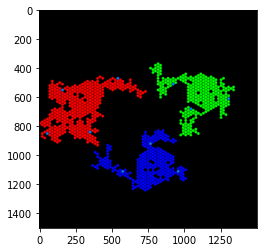

In [6]:
world, cmap, ocean, land_height, waste_list, bname_from_pid, last_pid = make(max_x=1024*8, max_y=1024*4, seed=2021, mod_name='tbic', num_rivers=30)
world.doodle_by_tile([(255,0,0),(0,255,0),(0,0,255)],size=(1500,1500))

In [80]:
from typing import Tuple
self = cmap
@dataclass
class RiverEdge:
    cube: Cube = None
    edge: int = 0
    start_xy: Tuple[int, int] = (0, 0)
    end_xy: Tuple[int, int] = (0, 0)
        
    def __hash__(self):
        return hash(tuple((self.cube.x, self.cube.y, self.cube.z, self.edge)))

    def set_xy(self, cmap):
        '''Set the start and end xy values for this edge.'''
        assert cmap.crisp
        cx, cy = cmap.c2cx[self.cube], cmap.c2cy[self.cube]
        from_el = self.cube.add(Cube(0, 1, -1).rotate_right(self.edge - 1))
        fcx, fcy = cmap.c2cx[from_el], cmap.c2cy[from_el]
        other_el = self.cube.add(Cube(0, 1, -1).rotate_right(self.edge))
        ocx, ocy = cmap.c2cx[other_el], cmap.c2cy[other_el]
        to_el = self.cube.add(Cube(0, 1, -1).rotate_right(self.edge + 1))
        tcx, tcy = cmap.c2cx[to_el], cmap.c2cy[to_el]
        self.start_xy = ((cx + fcx + ocx) // 3, (cy + fcy + ocy) // 3)
        self.end_xy = ((cx + tcx + ocx) // 3, (cy + tcy + ocy) // 3)

    def check_valid(self, land_height):
        if self.cube not in land_height:
            return False
        if self.cube.add(Cube(0, 1, -1).rotate_right(self.edge)) not in land_height:
            return False  # All river edges need to have land on the other side.
        return True

    def check_downhill(self, cmap):
        if self.start_xy == (0, 0):
            self.set_xy(cmap)
        return cmap.topo[self.start_xy[0], self.start_xy[1]] >= cmap.topo[self.end_xy[0], self.end_xy[1]]
    
    def check_final(self, land_height):
        if self.cube.add(Cube(0, 1, -1).rotate_right(self.edge - 1)) in land_height:
            return False  # This river is pointed towards a land hex.
        return self.check_valid(land_height)

    def upriver(self):
        return (RiverEdge(self.cube, self.edge - 1),
                RiverEdge(self.cube.add(Cube(0, 1, -1).rotate_right(self.edge - 1)), self.edge + 1))

In [69]:
num_rivers = 10
poss_final_edges = set()
for el, height in new_land_height.items():
    if height == 0:
        for rotation in range(6):
            RiverEdge(el, rotation)
            if RiverEdge(el, rotation).check_final(land_height):
                poss_final_edges.add(RiverEdge(el, rotation))
print(len(poss_final_edges))

400


In [81]:
a = list(land_height.keys())[0]
rotation = 5
f = a.add(Cube(0, 1, -1).rotate_right(rotation - 1))
o = a.add(Cube(0, 1, -1).rotate_right(rotation))
t = a.add(Cube(0, 1, -1).rotate_right(rotation + 1))
print(a, f, o, t)
print([x in land_height for x in [a, f, o, t]])


-1, 18, -17 -2, 18, -16 -2, 19, -17 -1, 19, -18
[True, True, True, False]


In [44]:
b = a.add(Cube(0, 1, -1).rotate_right(5))
print(a,b, b in land_height, a in land_height)

-1, 18, -17 -2, 19, -17 True True


In [82]:
edge = RiverEdge(a, 3)
edge.check_final(land_height)

True

In [83]:
a1, a2 = edge.upriver()
edge.set_xy(cmap)
a1.set_xy(cmap)
a2.set_xy(cmap)
print([(x.start_xy, x.end_xy) for x in [edge, a1, a2]])

[((4072.0, 1342.0), (4048.0, 1342.0)), ((4084.0, 1321.0), (4072.0, 1342.0)), ((4084.0, 1362.0), (4072.0, 1342.0))]


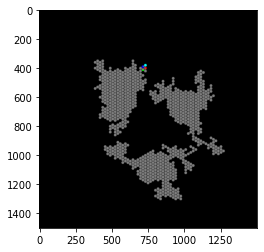

In [55]:
pfe_tile = Tile(hex_list=[], tile_list=[Tile(hex_list=list(land_height.keys())),
    Tile(hex_list=[a]), Tile(hex_list=[f]), Tile(hex_list=[o]), Tile(hex_list=[t]),])
pfe_tile.doodle_by_tile([(128,128,128), (255,0,0), (0,255,0),  (0,0,255),  (0,255,255)], size=(1500,1500))

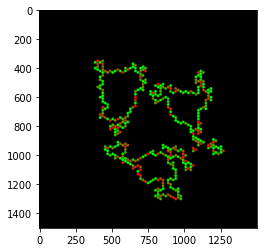

In [71]:
pfe_tile = Tile(hex_list=[], tile_list=[Tile(hex_list=[el.cube]) for el in poss_final_edges])
pfe_tile.doodle_by_tile([(255 - x,0 + x,0) for x in range(len(poss_final_edges))],size=(1500,1500))

In [67]:
new_land_height = {}
height = 0
next_set = set()
for el in world.real_hex_list():
    if any([nel in ocean for nel in el.neighbors()]):
        new_land_height[el] = height
        next_set.update([nel for nel in el.neighbors() if nel not in ocean])
current = set(next_set)
while len(current) > 0:
    height += 1
    next_set = set()
    for el in current:
        if el not in new_land_height:
            new_land_height[el] = height
        next_set.update([nel for nel in el.neighbors() if nel not in ocean and nel not in new_land_height])
    current = set(next_set)

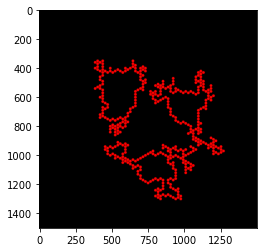

In [68]:
pfe_tile = Tile(hex_list=[], tile_list=[Tile(hex_list=[el for el, height in new_land_height.items() if height == 0])])
pfe_tile.doodle_by_tile([(255 - x * 10,0,0) for x in range(len(poss_final_edges))],size=(1500,1500))

In [18]:
len([el for el, height in land_height.items() if height == 1]) * 6

1248

In [22]:
connex = [0] * 3
for (ind_a, ind_b) in combinations(range(len(world.tile_list)), 2):
    tile_a = world.tile_list[ind_a]
    tile_b = world.tile_list[ind_b]
    strait_pairs, corner_pairs = tile_a.two_step_pairs(tile_b)
    print(connex, ind_a, ind_b, strait_pairs, corner_pairs, len(strait_pairs), len(corner_pairs))
    if len(strait_pairs) + len(corner_pairs) > 0:
        connex[ind_a] += 1
        connex[ind_b] += 1

[0, 0, 0] 0 1 [(Cube(-1, 10, -9), Cube(1, 9, -10))] [(Cube(-1, 10, -9), Cube(1, 8, -9)), (Cube(-1, 11, -10), Cube(1, 9, -10))] 1 2
[1, 1, 0] 0 2 [] [(Cube(-12, 0, 12), Cube(-12, -2, 14))] 0 1
[2, 1, 1] 1 2 [(Cube(20, -19, -1), Cube(19, -20, 1))] [(Cube(20, -19, -1), Cube(18, -19, 1))] 1 1


In [15]:
waste_list

[[Cube(-13, -5, 18), Cube(-12, -4, 16), Cube(-12, -5, 17)],
 [Cube(18, -11, -7)],
 [Cube(-8, 11, -3), Cube(-9, 11, -2)],
 [Cube(3, -21, 18), Cube(3, -20, 17), Cube(4, -21, 17)],
 [Cube(-14, 16, -2),
  Cube(-15, 18, -3),
  Cube(-13, 17, -4),
  Cube(-14, 17, -3),
  Cube(-15, 17, -2)],
 [Cube(-6, 16, -10),
  Cube(-6, 17, -11),
  Cube(-7, 16, -9),
  Cube(-5, 14, -9),
  Cube(-6, 15, -9),
  Cube(-7, 17, -10),
  Cube(-5, 15, -10),
  Cube(-5, 16, -11)],
 [Cube(-16, 22, -6),
  Cube(-15, 23, -8),
  Cube(-16, 21, -5),
  Cube(-15, 22, -7),
  Cube(-17, 23, -6)],
 [Cube(-16, 9, 7),
  Cube(-14, 10, 4),
  Cube(-17, 11, 6),
  Cube(-15, 10, 5),
  Cube(-16, 10, 6)],
 [Cube(-8, 7, 1), Cube(-10, 7, 3), Cube(-9, 7, 2)],
 [Cube(6, -17, 11)],
 [Cube(-8, 14, -6)],
 [Cube(12, 3, -15)],
 [Cube(6, -19, 13)],
 [Cube(-5, 18, -13)],
 [Cube(-9, 17, -8)],
 [Cube(-12, 15, -3)],
 [Cube(20, -4, -16)],
 [Cube(-2, -14, 16), Cube(-3, -13, 16)],
 [Cube(13, -4, -9)]]

In [20]:
world.tile_list[0].real_hex_list()[0]

Cube(-11, 13, -2)

In [18]:
Cube(0,1,-1).rotate_right(2)

Cube(1, -1, 0)

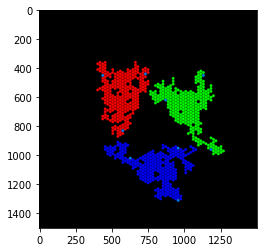

In [21]:
world.tile_list[0].origin.add_in_place(Cube(0,1,-1).rotate_right(2))
world.tile_list[0].rectify()
world.doodle_by_tile([(255,0,0),(0,255,0),(0,0,255)],size=(1500,1500))

In [12]:
os.makedirs("C:\\ck3_procedural\\testing_modgen\\events\\activities\\pilgrimage_activity\\", exist_ok=True)

In [8]:
os.path.exists("C:\\ck3_procedural\\data\\c_prussia\\common\\religion\\holy_sites")

False

In [3]:
mobject_mask_types = []
for filename in os.listdir("C:\\Program Files (x86)\\Steam\\steamapps\\common\\Crusader Kings III\\game\\content_source\\map_objects\\masks"):
    mobject_mask_types.append(filename)
print(mobject_mask_types)

['reeds_01_mask.png', 'steppe_bush_01_mask.png', 'tree_cypress_01_mask.png', 'tree_jungle_01_c_mask.png', 'tree_jungle_01_d_mask.png', 'tree_leaf_01_mask.png', 'tree_leaf_01_single_mask.png', 'tree_leaf_02_mask.png', 'tree_palm_01_mask.png', 'tree_pine_01_a_mask.png', 'tree_pine_01_b_mask.png', 'tree_pine_impassable_01_a_mask.png']


In [4]:
terrain_mask_types = ['beach_02', 'beach_02_mediterranean', 'beach_02_pebbles', 'coastline_cliff_brown', 'coastline_cliff_desert',
                      'coastline_cliff_grey', 'desert_01', 'desert_02', 'desert_cracked', 'desert_flat_01', 'desert_rocky',
                      'desert_wavy_01_larger', 'desert_wavy_01', 'drylands_01_cracked', 'drylands_01_grassy', 'drylands_01',
                      'drylands_grass_clean', 'farmland_01', 'floodplains_01', 'forestfloor_02', 'forestfloor', 'forest_jungle_01',
                      'forest_leaf_01', 'forest_pine_01', 'hills_01', 'hills_01_rocks', 'hills_01_rocks_medi', 'hills_01_rocks_small',
                      'india_farmlands', 'medi_dry_mud', 'medi_farmlands', 'medi_grass_01', 'medi_grass_02', 'medi_hills_01',
                      'medi_lumpy_grass', 'medi_noisy_grass', 'mountain_02_b', 'mountain_02_c', 'mountain_02_c_snow',
                      'mountain_02_desert_c', 'mountain_02_desert', 'mountain_02_d_desert', 'mountain_02_d', 'mountain_02_d_snow',
                      'mountain_02_d_valleys', 'mountain_02', 'mountain_02_snow', 'mud_wet_01', 'northern_hills_01',
                      'northern_plains_01', 'oasis', 'plains_01_desat', 'plains_01_dry', 'plains_01_dry_mud', 'plains_01',
                      'plains_01_noisy', 'plains_01_rough', 'snow', 'steppe_01', 'steppe_bushes', 'steppe_rocks', 'wetlands_02',
                      'wetlands_02_mud']

In [5]:
used_masks = {
    None: 'beach_02', 
    Terrain.farmlands: 'farmland_01',
    Terrain.plains: 'plains_01', 
    Terrain.floodplains: 'floodplains_01', 
    Terrain.taiga: 'snow',
    Terrain.wetlands: 'wetlands_02',
    Terrain.steppe: 'steppe_01',
    Terrain.drylands: 'drylands_01',
    Terrain.oasis: 'oasis', 
    Terrain.desert: 'desert_01',
    Terrain.jungle: 'forest_jungle_01',
    Terrain.forest: 'forest_leaf_01',
    Terrain.hills: 'hills_01',
    Terrain.mountains: 'mountain_02',
    Terrain.desert_mountains: 'mountain_02_desert_c',
}

In [30]:
from ck3map import TERRAIN_HEIGHT
from scipy.ndimage import gaussian_filter

In [50]:
self = cmap
WATER_HEIGHT = 18
self.topo = np.zeros((self.max_x,self.max_y))
land = np.zeros((self.max_x,self.max_y), dtype=bool)
all_wastes = set()
for waste in waste_list:
    for w in waste:
        all_wastes.add(w)
last_cube = None
last_waste = False
last_range = (0,0)
for x in range(self.max_x):
    for y in range(self.max_y):
        if self.valid_pixel(x,y):
            c = self.pixel_to_cube(x,y)
            if c != last_cube:
                if c in land_height:
                    last_height = WATER_HEIGHT + 1 + land_height[c] * 3
                    last_land = True
                elif c in ocean:
                    last_height = max(WATER_HEIGHT - 1 - ocean[c] * 3, 0)
                    last_land = False
                else:
                    last_height = 0
                    last_land = False
                if c in all_wastes:
                    last_waste = True
                else:
                    last_waste = False
                if c in self.d_cube2terr:
                    terr = self.d_cube2terr[c]
                    last_range = TERRAIN_HEIGHT[terr]
                    if last_waste and (terr in [Terrain.mountains, Terrain.desert_mountains]):
                        last_range = (last_range[0] + 10, last_range[1] + 20)
                else:
                    last_range = (0,0)
                last_cube = c
            if c in self.c2cx:
                r = max(0, 1 - (sqrt((self.c2cx[c] - x)**2 + (self.c2cy[c] - y)**2) / self.hex_size))  # This should be fine, but adding min(0) to be sure.
            else:
                r = 0
            try:
                self.topo[x,y] = last_height + last_range[0] + random.randint(0, int(r * last_range[1]))
            except:
                print(x, y, r, self.hex_size)
                raise ValueError
            land[x,y] = last_land
        else:
            self.topo[x,y] = 0
sigma = 2
self.topo = np.rint(gaussian_filter(self.topo, sigma=sigma))
for x in range(self.max_x):
    for y in range(self.max_y):
        if land[x,y]:
            self.topo[x,y] = max(self.topo[x,y], WATER_HEIGHT + 1)
        else:
            self.topo[x,y] = min(self.topo[x,y], WATER_HEIGHT - 1)
self.img_topology.putdata(self.topo.transpose().flatten())
self.img_topology.save(os.path.join("testing_modgen", "map_data", 'heightmap.png'))

In [48]:
pix = np.zeros((30,20))
r  = np.zeros((30,20))
for x in range(30):
    for y in range(20):
        c = self.pixel_to_cube(3810 + x, 1820 + y)
        last_height = WATER_HEIGHT + 1 + land_height[c] * 3
        terr = self.d_cube2terr[c]
        last_range = TERRAIN_HEIGHT[terr]
        r[x,y] = max(0, 1 - (sqrt((self.c2cx[c] - 3810 - x)**2 + (self.c2cy[c] - 1820 - y)**2) / self.hex_size))
        pix[x,y] = last_height + last_range[0] + random.randint(0, int(r[x,y] * last_range[1]))

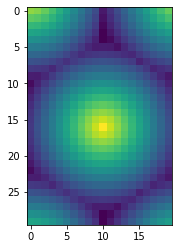

In [49]:
plt.imshow(r)

In [47]:
r

array([[0.16666667, 0.186339  , 0.23570226, 0.30046261, 0.372678  ,
        0.44876373, 0.52704628, 0.60667582, 0.68718427, 0.76829537,
        0.93169499, 0.84983659, 0.76829537, 0.68718427, 0.60667582,
        0.52704628, 0.44876373, 0.372678  , 0.30046261, 0.23570226],
       [0.25      , 0.26352314, 0.30046261, 0.35355339, 0.41666667,
        0.48591266, 0.55901699, 0.63464776, 0.71200031, 0.79056942,
        0.95014619, 0.87002554, 0.79056942, 0.71200031, 0.63464776,
        0.55901699, 0.48591266, 0.41666667, 0.35355339, 0.30046261],
       [0.33333333, 0.34359214, 0.372678  , 0.41666667, 0.47140452,
        0.53359369, 0.60092521, 0.67185481, 0.74535599, 0.82073815,
        0.97539166, 0.89752747, 0.82073815, 0.74535599, 0.67185481,
        0.60092521, 0.53359369, 0.47140452, 0.41666667, 0.372678  ],
       [0.41666667, 0.42491829, 0.44876373, 0.48591266, 0.53359369,
        0.58925565, 0.65085414, 0.71686044, 0.78616509, 0.85796918,
        1.0069205 , 0.93169499, 0.85796918, 0

In [6]:
import PIL.Image

In [7]:
out_dir = "C:\\ck3_procedural\\testing_modgen\\gfx\\map\\terrain"
os.makedirs(out_dir, exist_ok=True)
terr_masks = {}
pixels = {}
for terr_name in terrain_mask_types:
    terr_masks[terr_name] = PIL.Image.new('L', (cmap.max_x,cmap.max_y),  "black")
    if terr_name in used_masks.values():
        pixels[terr_name] = terr_masks[terr_name].load()
flatmap = PIL.Image.new('RGB', (cmap.max_x,cmap.max_y),  "black")
fpixels = flatmap.load()
last_cube = None
ocean_terr = used_masks[None]
flat_dry = (170, 160, 140)
flat_wet = (110, 110, 100)
last_terr = ocean_terr
last_flat = flat_wet
for x in range(cmap.max_x):
    for y in range(cmap.max_y):
        if cmap.valid_pixel(x,y):
            c = cmap.pixel_to_cube(x,y)
            if c != last_cube:
                if c in cmap.d_cube2terr:
                    last_terr = used_masks[cmap.d_cube2terr[c]]
                    last_flat = flat_dry
                else:
                    last_terr = ocean_terr
                    last_flat = flat_wet
                last_cube = c
            pixels[last_terr][x,y] = 255
            fpixels[x,y] = last_flat
        else:
            pixels[ocean_terr][x,y] = 255
            fpixels[x,y] = flat_wet
for terr_name in terrain_mask_types:
    terr_masks[terr_name].save(os.path.join(out_dir, terr_name + '_mask.png'))
flatmap.save(os.path.join(out_dir, 'flatmap.png'))
PIL.Image.new('RGB', (cmap.max_x,cmap.max_y),  (64,64,64)).save(os.path.join(out_dir, 'colormap.png'))

In [8]:
map_object_mask_types = ['reeds_01_mask.png', 'steppe_bush_01_mask.png', 'tree_cypress_01_mask.png', 'tree_jungle_01_c_mask.png', 'tree_jungle_01_d_mask.png', 'tree_leaf_01_mask.png', 'tree_leaf_01_single_mask.png', 'tree_leaf_02_mask.png', 'tree_palm_01_mask.png', 'tree_pine_01_a_mask.png', 'tree_pine_01_b_mask.png', 'tree_pine_impassable_01_a_mask.png']
used_mobj_masks = {
    Terrain.jungle: 'tree_jungle_01_c_mask.png',
    Terrain.forest: 'tree_leaf_01_mask.png',
}
out_dir = "C:\\ck3_procedural\\testing_modgen\\content_source\\map_objects\\masks"
os.makedirs(out_dir, exist_ok=True)
mobj_masks = {}
pixels = {}
for mobj_name in map_object_mask_types:
    mobj_masks[mobj_name] = PIL.Image.new('L', (cmap.max_x // 2,cmap.max_y // 2),  "black")
    if mobj_name in used_mobj_masks.values():
        pixels[mobj_name] = mobj_masks[mobj_name].load()
last_cube = None
last_terr = None
for x in range(0, cmap.max_x, 2):
    for y in range(0, cmap.max_y, 2):
        if cmap.valid_pixel(x,y):
            c = cmap.pixel_to_cube(x,y)
            if c != last_cube:
                if c in cmap.d_cube2terr and cmap.d_cube2terr[c] in used_mobj_masks:
                    last_terr = used_mobj_masks[cmap.d_cube2terr[c]]
                else:
                    last_terr = None
                last_cube = c
            if last_terr:
                pixels[last_terr][x // 2,y // 2] = 128  # Probably this should be dependent on distance from hex center.
for mobj_name in map_object_mask_types:
    mobj_masks[mobj_name].save(os.path.join(out_dir, mobj_name))

In [ ]:
PIL.Image.new('RGB', cmap)

In [13]:
o = cmap.hex_size // 6
filedir = "C:\\Users\\Vaniver\\Documents\\Paradox Interactive\\Crusader Kings III\\mod\\sit\\gfx\\map\\map_object_data"
obj_types = {"building_locators.txt": (o, 0),
             "siege_locators.txt": (0, -o),
             "combat_locators.txt": (-o, 0),
             "player_stack_locators.txt": (0, o),
             }
for filename, path in obj_types.items():
    with open(os.path.join(filedir, filename), "a", encoding='utf-8') as outf:
        outf.write("\n")
        dx = path[0]
        dy = path[1]
        for cube, pid in cmap.d_cube2pid.items():
            if pid in bname_from_pid:
                x, y = cmap.c2cx[cube], cmap.max_y - cmap.c2cy[cube]
                outf.write("\t\t{\n")
                outf.write(f"\t\t\tid={pid}\n")
                outf.write(f"\t\t\tposition={{ {x + dx}.0 0.0 {y + dy}.0 }}\n")
                outf.write("\t\t\trotation={ 0.0 0.0 0.0 -1.0 }\n")
                outf.write("\t\t\tscale={ 1.0 1.0 1.0 }\n")
                outf.write("\t\t}\n")
        outf.write("\t}\n}\n")

In [3]:
from scipy.ndimage import gaussian_filter

In [4]:
pixels = cmap.img_topology.load()
topo = np.zeros((cmap.max_x, cmap.max_y))
for x in range(cmap.max_x):
    for y in range(cmap.max_y):
        topo[x,y] = pixels[x,y]

In [14]:
type(pixels[0,0])

int

In [5]:
topo.shape

(8192, 4096)

In [28]:
topos = {}
for s in range(1,4):
    topos[s] = np.rint(gaussian_filter(topo, sigma=2**s)).astype(int)
    for x in range(cmap.max_x):
        for y in range(cmap.max_y):
            pixels[x,y] = int(topos[s][x,y])
    cmap.img_topology.save(os.path.join("testing_modgen", "map_data", f"heightmap-{s}.png"))

In [18]:
topos[0] = np.rint(topos[0]).astype(int)

0

In [24]:
for x in range(cmap.max_x):
    for y in range(cmap.max_y):
        pixels[x,y] = int(topos[0][x,y])


In [26]:
cmap.img_topology.save(os.path.join("testing_modgen", "map_data", 'heightmap-0.png'))

In [35]:
import os

orig_dir = "C:\\Program Files (x86)\\Steam\\steamapps\\common\\Crusader Kings III\\game\\gfx\\map\\terrain"
mod_dir = "C:\\Users\\Vaniver\\Documents\\Paradox Interactive\\Crusader Kings III\\mod\\sit2\\gfx\\map\\terrain"
old_loc = os.path.join(mod_dir, "blank_mask.png")
for filename in os.listdir(orig_dir):
    if filename.endswith("mask.png"):
        new_loc = os.path.join(mod_dir, filename)
        os.system(f"copy \"{old_loc}\" \"{new_loc}\"")


In [34]:
print(old_loc)

C:\Users\Vaniver\Documents\Paradox Interactive\Crusader Kings III\mod\sit2\gfx\map\terrain\blank_mask.png


In [1]:
barony_mapping = {}
title = 'c_latium'
src_dir = 'C:\\ck3_procedural\\data'
pid = 1
bnum = 0
with open(os.path.join(src_dir, title, "common", "landed_titles", "landed_titles.txt"), encoding='utf8') as inf:
    for line in inf.readlines():
        # if line.startswith("\t\td_"):
            # if title[0] == "k":
            #     kingdom_duchy_list.append(line.split("=")[0].strip())
            # else:
            #     geo_region_duchy_list.append(line.split("=")[0].strip())
        if "\t\tb_" in line:
            bname = line.split('\t\tb_')[1].split('=')[0].strip()
        if "province = P" in line:
            barony_mapping["P" + str(bnum)] = str(pid)
            bnum += 1
            line = line.split("= P")[0] + "= " + str(pid) + "\n"
            # bname_from_pid[pid] = bname
            pid += 1
        # if title[0] == 'k':
        #     kingdom_buffer += line
        # else:
            # print(line)
print(barony_mapping)

{'P0': '1', 'P1': '2', 'P2': '3', 'P3': '4', 'P4': '5', 'P5': '6', 'P6': '7', 'P7': '8', 'P8': '9', 'P9': '10', 'P10': '11', 'P11': '12', 'P12': '13', 'P13': '14', 'P14': '15', 'P15': '16', 'P16': '17', 'P17': '18', 'P18': '19', 'P19': '20', 'P20': '21', 'P21': '22'}


In [3]:
random.randint(0,0)

0

In [3]:
for start_trio, riv in cmap.d_trio2river.items():
    print(riv.start_xy, riv.end_xy)

(946, 1242) (940, 1232)
(940, 1232) (940, 1225)
(940, 1225) (940, 1218)
(940, 1218) (940, 1211)


In [4]:
for start_trio, riv in cmap.d_trio2river.items():
    print([cmap.valid_cubes[el] for el in start_trio],
          [cmap.valid_cubes[el] for el in riv.end_trio])

[Cube(-5, -8, 13), Cube(-4, -9, 13), Cube(-4, -8, 12)] [Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -8, 12)]
[Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -8, 12)] [Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -7, 11)]
[Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -7, 11)] [Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -6, 10)]
[Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -6, 10)] [Cube(-5, -8, 13), Cube(-5, -7, 12), Cube(-4, -5, 9)]


In [5]:
for start_trio, riv in cmap.d_trio2river.items():
    start_cubes = [cmap.valid_cubes[el] for el in start_trio]
    end_cubes = [cmap.valid_cubes[el] for el in riv.end_trio]

    print([(cmap.c2cx[c], cmap.c2cy[c]) for c in start_cubes],
          [(cmap.c2cx[c], cmap.c2cy[c]) for c in end_cubes])

[(934.0, 1243.0), (952.0, 1253.0), (952.0, 1232.0)] [(934.0, 1243.0), (934.0, 1222.0), (952.0, 1232.0)]
[(934.0, 1243.0), (934.0, 1222.0), (952.0, 1232.0)] [(934.0, 1243.0), (934.0, 1222.0), (952.0, 1212.0)]
[(934.0, 1243.0), (934.0, 1222.0), (952.0, 1212.0)] [(934.0, 1243.0), (934.0, 1222.0), (952.0, 1191.0)]
[(934.0, 1243.0), (934.0, 1222.0), (952.0, 1191.0)] [(934.0, 1243.0), (934.0, 1222.0), (952.0, 1170.0)]


In [4]:
cmap.rivers(land_height, bname_from_pid, 1, last_pid, "testing_worldgen")

-10, -25, 35 30.0


AssertionError: 

In [6]:
cmap.pixel_to_cube(964, 815)

Cube(-3, 12, -9)

In [10]:
2048-cmap.c2cy[Cube(-3, 12, -9)]

806.0

In [4]:
source = random.choices(population=list(land_height.keys()), weights=list(land_height.values()), k=1)[0]
print(source)

-4, -8, 12


In [67]:
source = Cube(-4,-8,12)

In [5]:
self = cmap

In [62]:
import itertools

In [68]:
height = 0
for rot in range(6):
    trio = [source, source.add(Cube(-1,0,1).rotate_right(rot)),source.add(Cube(-1,0,1).rotate_right(rot+1))]
    print(trio)
    print([a.dist(b) for a,b in itertools.combinations(trio, 2)])
    tx, ty = self.find_vertex(trio)
    if self.topo[tx,ty] >= height:
        b3cubes = trio
        height = self.topo[tx,ty]
        sx, sy = tx, ty
assert height > 0
width = 0
start_trio = self.cubes2trio(b3cubes)
print(start_trio)
print([a.dist(b) for a,b in itertools.combinations(b3cubes, 2)])
if start_trio in self.d_trio2river:
    print("False")
b3cube_total = b3cubes[0].add(b3cubes[1]).add(b3cubes[2])

[Cube(-4, -8, 12), Cube(-5, -8, 13), Cube(-5, -7, 12)]
[1, 1, 1]
[Cube(-4, -8, 12), Cube(-5, -7, 12), Cube(-4, -7, 11)]
[1, 1, 1]
[Cube(-4, -8, 12), Cube(-4, -7, 11), Cube(-3, -8, 11)]
[1, 1, 1]
[Cube(-4, -8, 12), Cube(-3, -8, 11), Cube(-3, -9, 12)]
[1, 1, 1]
[Cube(-4, -8, 12), Cube(-3, -9, 12), Cube(-4, -9, 13)]
[1, 1, 1]
[Cube(-4, -8, 12), Cube(-4, -9, 13), Cube(-5, -8, 13)]
[1, 1, 1]
(1604, 1671, 1672)
[1, 1, 1]


In [81]:
print(b3cubes)
print(b3cubes[0].add(b3cubes[1]).add(b3cubes[2]))
print(b3cube_total)

[Cube(-4, -8, 12), Cube(-3, -8, 11), Cube(-3, -9, 12)]
-10, -25, 35
-10, -25, 35


In [78]:
height = 256
for away_cube_ind in range(3):
    # The next cube is the sum of the two cubes you follow minus the one you're moving away from.
    # For reasons, I'm calculating this as a+b+c-a-a instead of b+c-a.
    away_cube = b3cubes[away_cube_ind]
    print(away_cube)
    next_cube = b3cube_total.sub(away_cube).sub(away_cube)
    print(next_cube, [self.valid_cubes.index(next_cube)])
    next_trio = tuple(sorted([el for ind, el in enumerate(start_trio) if ind != away_cube_ind] + [self.valid_cubes.index(next_cube)]))
    tx, ty = self.find_vertex(next_trio)
    print([self.valid_cubes[el] for el in next_trio])
    print([self.valid_cubes[a].dist(self.valid_cubes[b]) for a,b in itertools.combinations(next_trio,2)])
    print(next_trio, self.topo[tx,ty])
    if self.topo[tx,ty] <= height:
        end_trio = next_trio
        end_away_cube = away_cube
        height = self.topo[tx,ty]
        end_xy = tx, ty
print(b3cube_total, height)

-4, -8, 12
-2, -9, 11 [1740]
[Cube(-4, -7, 11), Cube(-3, -9, 12), Cube(-2, -9, 11)]
[2, 2, 1]
(1605, 1671, 1740) 50.0
-3, -8, 11
-4, -9, 13 [1603]
[Cube(-4, -9, 13), Cube(-4, -8, 12), Cube(-3, -9, 12)]
[1, 1, 1]
(1603, 1604, 1671) 30.0
-3, -9, 12
-4, -7, 11 [1605]
[Cube(-4, -8, 12), Cube(-4, -7, 11), Cube(-4, -7, 11)]
[1, 1, 0]
(1604, 1605, 1605) 40.0
-10, -25, 35 30.0


In [54]:
print(end_trio)

(1604, 1605, 1671)


In [7]:
self.d_trio2river[start_trio] = RiverEdge(width=width, start_trio=start_trio, start_xy=(sx,sy), end_trio=end_trio, end_xy=end_xy, source=True, merge=False)

In [70]:
print(end_trio, end_xy, end_away_cube, start_trio, width + 1)
away_cube = end_away_cube
source_trio = start_trio
start_trio = end_trio
start_xy = end_xy
width += 1

(1604, 1605, 1671) (958, 819) -3, -9, 12 (1604, 1671, 1672) 1


In [41]:
print(end_trio, end_xy, away_cube, source_trio, width + 1)
start_trio = end_trio
start_xy = end_xy
width += 1

(1538, 1605, 1671) (952, 822) -4, -8, 12 (1604, 1671, 1672) 2


In [14]:
print(end_trio, end_xy, away_cube, source_trio, width + 1)
start_trio = end_trio
start_xy = end_xy
width += 1

(1538, 1605, 1739) (958, 819) -5, -7, 12 (1604, 1671, 1672) 3


In [71]:
print(start_trio)
start_cubes = [self.valid_cubes[start_trio[0]], self.valid_cubes[start_trio[1]], self.valid_cubes[start_trio[2]]]
print(start_cubes)
# Find which of the two directions is lower.
height = 256
for t_ind, t_cube in enumerate(start_cubes):
    print(t_cube, t_cube.dist(away_cube))
    if t_cube.dist(away_cube) != 1:
        continue
    next_cube = t_cube.add(t_cube).sub(away_cube)
    print(away_cube, t_cube, next_cube)
    next_trio = tuple(sorted([el for ind, el in enumerate(start_trio) if ind != t_ind] + [self.valid_cubes.index(next_cube)]))
    tx, ty = self.find_vertex(next_trio)
    print(self.topo[tx, ty])
    if self.topo[tx,ty] <= height:
        end3cubes = next_trio
        end_cube = next_cube
        height = self.topo[tx,ty]
        end_xy = (tx, ty)
assert height < 256
away_cube = [c for c in start_cubes if c not in end3cubes][0]
print(away_cube)
end_trio = self.cubes2trio(end3cubes)
print(next_cube in land_height)

(1604, 1605, 1671)
[Cube(-4, -8, 12), Cube(-4, -7, 11), Cube(-3, -9, 12)]
-4, -8, 12 1
-3, -9, 12 -4, -8, 12 -5, -7, 12
40.0
-4, -7, 11 2
-3, -9, 12 0
-4, -8, 12
True


In [73]:
for el in [1604, 1605, 1671]:
    c = self.valid_cubes[el]
    print(self.c2cx[c], self.c2cy[c])

952.0 816.0
952.0 836.0
970.0 805.0


In [75]:
print([self.valid_cubes[a].dist(self.valid_cubes[b]) for a,b in itertools.combinations([1604, 1605, 1671], 2)])

[1, 1, 2]


In [34]:
for el in [1537, 1538, 1603, 1604, 1670]:
    print(self.valid_cubes[el])

-5, -8, 13
-5, -7, 12
-4, -9, 13
-4, -8, 12
-3, -10, 13


In [37]:
[(k, v) for k, v in self.d_trio2vertex.items() if v[1] == 805]

[((1603, 1604, 1671), (958, 805)),
 ((1537, 1603, 1604), (946, 805)),
 ((1536, 1537, 1538), (934, 805)),
 ((1537, 1538, 1670), (946, 805))]

In [22]:
cmap = CK3Map(192, 192, hex_size = 6, map_size = 8, crisp=True, default = (255,255,255))

In [14]:
for a_ind, b_ind in combinations(range(3), 2):
    a = world.tile_list[a_ind]
    b = world.tile_list[b_ind]
    print(a_ind, b_ind, [(hex_a, hex_b) for hex_a, hex_b in product(a.real_hex_list(), b.real_hex_list()) if hex_a.dist(hex_b) == 2])

0 1 [(Cube(-1, 15, -14), Cube(1, 13, -14))]
0 2 []
1 2 [(Cube(16, -15, -1), Cube(14, -15, 1)), (Cube(15, -14, -1), Cube(14, -15, 1))]


In [48]:
a = Cube(15, -14, -1)
b = Cube(14, -15, 1)
print(a.neighbors())
print(b.neighbors())
[c for c in a.neighbors() if c in b.neighbors()]

{Cube(15, -13, -2), Cube(16, -14, -2), Cube(14, -13, -1), Cube(16, -15, -1), Cube(15, -15, 0), Cube(14, -14, 0)}
{Cube(13, -14, 1), Cube(14, -16, 2), Cube(15, -16, 1), Cube(13, -15, 2), Cube(15, -15, 0), Cube(14, -14, 0)}


[Cube(15, -15, 0), Cube(14, -14, 0)]

In [61]:
for x in cmap.cubes2trio([a] + [c for c in a.neighbors() if c in b.neighbors()]):
    print(x)

2779
2835
2836


In [66]:
c3 = [a] + [c for c in a.neighbors() if c in b.neighbors()]

In [71]:
import itertools
for perm in itertools.permutations(c3):
    print(perm[0].add(perm[1]).sub(perm[2]).sub(perm[2]))

2, -1, -1
-1, 2, -1
2, -1, -1
-1, -1, 2
-1, 2, -1
-1, -1, 2


In [51]:
cc = [c for c in a.neighbors() if c in b.neighbors()]

In [72]:
a = Cube()
b = Cube(-2,1,1)
c3 = [a] + [c for c in a.neighbors() if c in b.neighbors()]
for perm in itertools.permutations(c3):
    print(perm[0].add(perm[1]).sub(perm[2]).sub(perm[2]))

1, 1, -2
1, -2, 1
1, 1, -2
-2, 1, 1
1, -2, 1
-2, 1, 1


In [76]:
from typing import Tuple
@dataclass
class RiverEdge:
    weight: int = 0
    start_trio: Tuple[int, int, int] = (0, 0, 0)
    start_xy: Tuple[int, int] = (0, 0)
    end_trio: Tuple[int, int, int] = (0, 0, 0)
    end_xy: Tuple[int, int] = (0, 0)
    merge: bool = False
    source: bool = False

In [84]:
def calc_rivers(self, num_rivers, land_height, ocean):
    '''Calculate num_rivers rivers, adding them to self.d_trio2river'''
    for i in range(num_rivers):
        # Choose a random hex, weighted by height.
        source = random.choices(population=list(land_height.keys()), weights=list(land_height.values()), k=1)[0]
        worked = False
        while not worked:
            worked = source_river(self, source, land_height, ocean)

def source_river(self, source, land_height, ocean) -> bool:
    '''Source is a cube. First find its highest vertex, and then extend it towards the ocean. 
    Returns True if successful, False if restarting a previously started river.'''
    height = 0
    for rot in range(6):
        trio = [source, source.add(Cube(-1,0,1).rotate_right(rot)),source.add(Cube(-1,0,1).rotate_right(rot+1))]
        tx, ty = self.find_vertex(trio)
        if self.topo[tx,ty] >= height:
            b3cubes = trio
            height = self.topo[tx,ty]
            sx, sy = tx, ty
    assert height > 0
    width = 0
    start_trio = self.cubes2trio(b3cubes)
    if start_trio in self.d_trio2river:
        return False
    b3cube_total = b3cubes[0].add(b3cubes[1]).add(b3cubes[2])
    # Find the lowest of the adjacent vertices.
    height = 256
    for away_cube_ind in range(3):
        # The next cube is the sum of the two cubes you follow minus the one you're moving away from.
        # For reasons, I'm calculating this as a+b+c-a-a instead of b+c-a.
        away_cube = b3cubes[away_cube_ind]
        next_cube = b3cube_total.sub(away_cube).sub(away_cube)
        next_trio = sorted(start_trio[:away_cube_ind] + [self.valid_cubes.index(next_cube)] + start_trio[away_cube_ind+1:])
        tx, ty = self.find_vertex(trio)
        if self.topo[tx,ty] <= height:
            end3cubes = trio
            end_away_cube = away_cube
            height = self.topo[tx,ty]
            end_xy = tx, ty
    assert height < 256
    # Now we have the end of the first river edge.
    end_trio = self.cubes2trio(end3cubes)
    self.d_trio2river[start_trio] = RiverEdge(weight=weight, start_trio=start_trio, start_xy=(sx,sy), end_trio=end_trio, end_xy=end_xy, source=True, merge=False)
    extend_river(self, end_trio, away_cube, start_trio, weight + 1)
    return True
        

def extend_river(self, start_trio, start_xy, away_cube, source_trio, weight):
    '''Given a river start_trio (the ending of the previous) and the cube it was moving away from, extend it towards the ocean.
    source_trio is used to delete 'source' from the first edge if this river merges into another.'''
    if start_trio in self.d_trio2river:
        self.d_trio2river[start_trio].source = False
        join_flow(start_trio, weight)
        return
    start_cubes = [self.valid_cubes[start_trio[0]], self.valid_cubes[start_trio[1]], self.valid_cubes[start_trio[2]]]
    # Find which of the two directions is lower.
    height = 256
    for t_ind, t_cube in enumerate(start_cubes):
        if t_cube.dist(away_cube) != 1:
            continue
        next_cube = t_cube.add(t_cube).sub(away_cube)
        new_trio = sorted(start_trio[:t_ind] + [self.valid_cubes.index(next_cube)] + start_trio[t_ind+1:])
        tx, ty = self.find_vertex(new_trio)
        if self.topo[tx,ty] <= height:
            end3cubes = new_trio
            height = self.topo[tx,ty]
            end_xy = (tx, ty)
    assert height < 256
    # Now we know which way to keep flowing.
    away_cube = [c for c in start_cubes if c not in end3cubes][0]
    end_trio = self.cubes2trio(end3cubes)
    if end_trio in self.d_trio2river:
        # We've run into a previous river. We need to figure out if it's a source or not.
        if self.d_trio2river[end_trio].source:
            self.d_trio2river[start_trio] = RiverEdge(weight=weight, start_trio=start_trio, start_xy=start_xy, end_trio=end_trio, end_xy=end_xy, source=False, merge=False)
        else:
            self.d_trio2river[start_trio] = RiverEdge(weight=weight, start_trio=start_trio, start_xy=start_xy, end_trio=end_trio, end_xy=end_xy, source=False, merge=True)
            self.d_trio2river[source_trio].source = False
    else:
        self.d_trio2river[start_trio] = RiverEdge(weight=weight, start_trio=start_trio, start_xy=start_xy, end_trio=end_trio, end_xy=end_xy, source=False, merge=False)
    if height > WATER_HEIGHT:  # If we haven't reached water, keep going.
        extend_river(self, end_trio, end_xy, away_cube, source_trio, weight + 1)

def join_flow(self, trio, weight):
    self.d_trio2river[trio].weight += weight
    next_trio = self.d_trio2river[trio].end_trio
    if next_trio in self.d_trio2river:
        join_flow(self, next_trio, weight)

In [85]:
calc_rivers(cmap, 1, land_height, ocean)

AttributeError: 'CK2Map' object has no attribute 'find_vertex'

In [31]:
land_height = {}
boundary = world.boundary()
height = 0
next_set = set()

In [32]:
for el in boundary:
    if any([nel in ocean for nel in el.neighbors()]):
        land_height[el] = height
        next_set.update([nel for nel in el.neighbors() if nel not in ocean])

In [33]:
len(land_height)

356

In [148]:
import PIL.Image
testing = PIL.Image.new('RGB', (128, 128), "white")

In [118]:
import heapq
from itertools import count


ImportError: cannot import name 'izip' from 'itertools' (unknown location)

In [129]:
from itertools import groupby
def paint_edge_crisp(start_xy, end_xy, paint, pixels, merge=None, extend=False):
    '''Paint a river segment from start_xy to end_xy. Crisp maps only!
    If extend is true, will continue in the same direction for RIVER_EXTEND pixels.'''
    if start_xy[1] == end_xy[1]:  # Only horizontal edges are possible.
        extend = RIVER_EXTEND if extend else 0
        dest = end_xy[0] - 1 + extend
        for x in range(start_xy[0], dest):
            pixels[x, start_xy[1]] = paint
        if merge:
            pixels[dest, start_xy[1]] = merge
        else:
            pixels[dest, start_xy[1]] = paint
    else: # We have an angled edge.
        del_x = (1,0) if end_xy[0] - start_xy[0] > 0 else (-1,0)
        del_y = (0,1) if end_xy[1] - start_xy[1] > 0 else (0,-1)
        x_dist = abs(end_xy[0] - start_xy[0])
        x_path = [del_x] * x_dist
        y_dist = abs(end_xy[1] - start_xy[1])
        y_path = [del_y] * y_dist
        if extend:
            p = x_dist / (x_dist + y_dist)
            for _ in range(RIVER_EXTEND):
                if random.random() < p:  # big x => high p => add more xs. 
                    x_path.append(del_x)
                    x_dist += 1
                else:
                    y_path.append(del_y)
                    y_dist += 1
        m_dist = x_dist + y_dist
        path = [x[1] for x in heapq.merge(zip(count(0, y_dist), x_path), zip(count(0, x_dist), y_path))]
        cx, cy = start_xy
        for x,y in path[:-1]:  # We don't do the last pixel because it would overwrite the next one.
            pixels[cx, cy] = paint
            cx += x
            cy += y
        if merge:
            pixels[cx, cy] = merge
        else:
            pixels[cx, cy] = paint

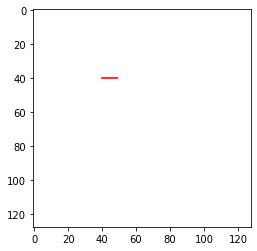

In [149]:
pixels = testing.load()
paint_edge_crisp((40,40), (50,40), (255,0,0), pixels)
plt.imshow(testing)
plt.show()


-1 0
0 1
0 1
-1 0
0 1
0 1
-1 0
0 1
0 1
-1 0
0 1
0 1
-1 0
0 1


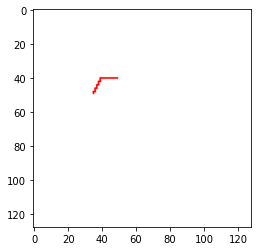

In [150]:
paint_edge_crisp((40,40), (35,50), (255,0,0), pixels)
plt.imshow(testing)
plt.show()

0 1
1 0
0 1
1 0
0 1
0 1
1 0
0 1
0 1
1 0
0 1
0 1
1 0


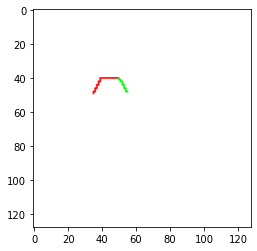

In [151]:
paint_edge_crisp((50,40), (55,49), (0,255,0), pixels)
plt.imshow(testing)
plt.show()

In [144]:
WATER = 254

def paint_major_river_crisp(self, riv, r_pixels, p_pixels):
    '''Paint a major river segment defined by riv. Crisp maps only!'''
    rgb = new_rgb(self.d_cube2rgb)
    self.d_cube2rgb[riv.start_trio] = rgb
    if riv.start_xy[1] == riv.end_xy[1]:  # Only horizontal edges are possible.
        for x in range(riv.start_xy[0], riv.end_xy[0]):
            r_pixels[x, riv.start_xy[1] - 1] = WATER
            r_pixels[x, riv.start_xy[1]] = WATER
            r_pixels[x, riv.start_xy[1] + 1] = WATER
    else: # We have an angled edge.
        del_x = (1,0) if riv.end_xy[0] - riv.start_xy[0] > 0 else (-1,0)
        del_y = (0,1) if riv.end_xy[1] - riv.start_xy[1] > 0 else (0,-1)
        x_dist = abs(riv.end_xy[0] - riv.start_xy[0])
        x_path = [del_x] * x_dist
        y_dist = abs(riv.end_xy[1] - riv.start_xy[1])
        y_path = [del_y] * y_dist
        m_dist =  x_path + y_path
        # Interleaving the two paths; stolen from Stack Overflow.
        path = [x[1] for x in heapq.merge(zip(count(0, y_dist), x_path), zip(count(0, x_dist), y_path))]
        cx, cy = riv.start_xy
        for x,y in path:
            r_pixels[cx, cy] = WATER
            r_pixels[cx + del_x[0], cy] = WATER
            r_pixels[cx, cy + del_y[1]] = WATER
            cx += x
            cy += y

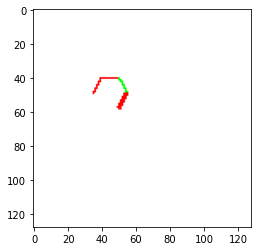

In [152]:
riv = RiverEdge(10, (0,0,0), (55,49), (0,0,0), (50,58), False, False)
paint_major_river_crisp(cmap, riv, pixels, None)
plt.imshow(testing)
plt.show()

In [146]:
x_dist = abs(riv.end_xy[0] - riv.start_xy[0])
y_dist = abs(riv.end_xy[1] - riv.start_xy[1])
print(x_dist, y_dist)

5 1


In [42]:
for el in current:
    if el not in land_height:
        land_height[el] = height
    next_set.update([nel for nel in el.neighbors() if nel not in ocean and nel not in land_height])

In [43]:
print(len(land_height))
print(len(current))
print(len(next_set))

596
596
330


In [44]:
sum(land_height.values())

240

In [46]:
land_height = calc_land_height(world, ocean)

In [47]:
max(land_height.values())

6

In [4]:
mod_dir = 'C:\\ck3_procedural\\testing_modgen'
import os
os.path.exists(mod_dir)

True

In [6]:
import shutil
shutil.rmtree(mod_dir)

In [2]:
random.seed(1945)

In [3]:
start_time = time.time()
continent = new_continent_gen(3)
end_time = time.time()
print(end_time-start_time)

water access 0
Added 3 kingdoms!
{'water access 0': 1}
1.3124897480010986


In [4]:
continent, kingdoms = continent

In [5]:
continent.rectify()

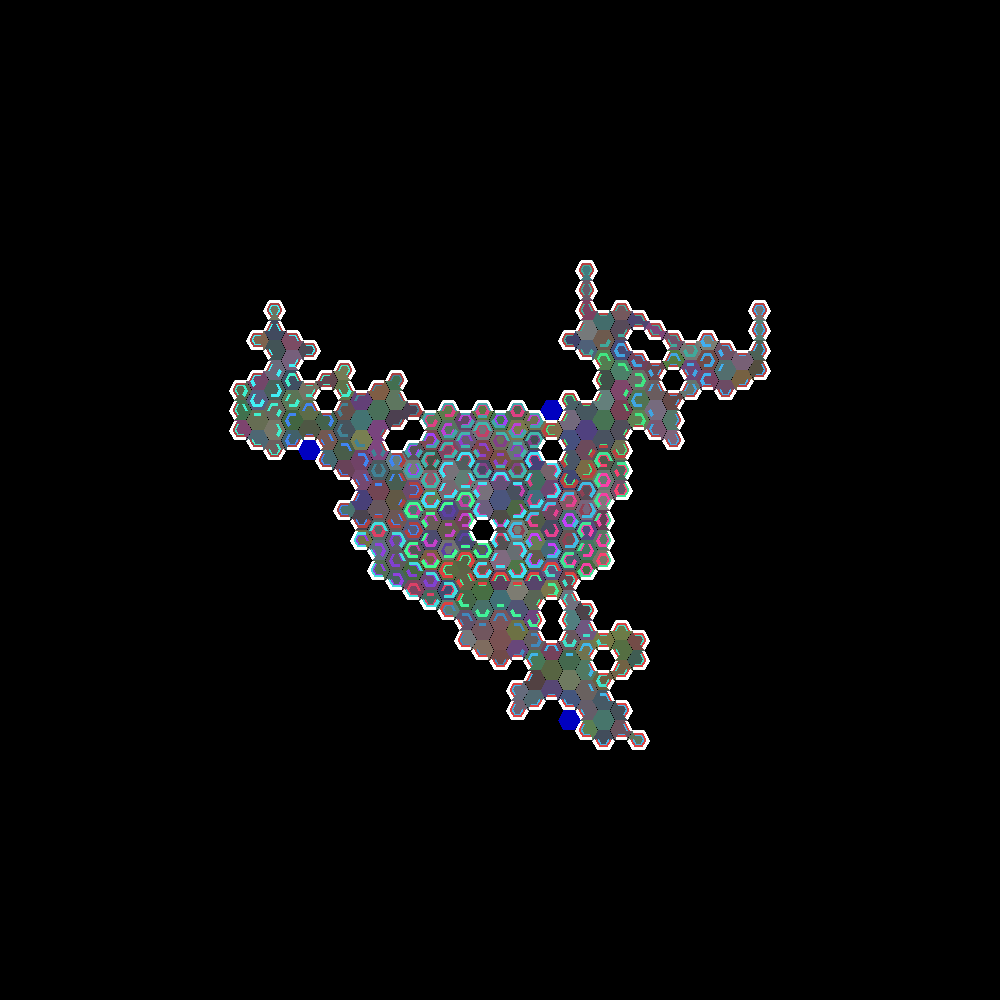

In [6]:
bdc = BorderDoodler(continent, size=(1000,1000),radius=10, depth=2)
bdc.im

In [7]:
[len(t.relative_hex_list()) for t in continent.tile_list]

[22, 61, 61, 61, 12, 12, 12, 12, 12, 12]

In [13]:
[sum([len(st.tile_list) for st in t.tile_list]) for t in continent.tile_list]##

[0, 16, 16, 16, 0, 0, 0, 0, 0, 0]

In [7]:
from enum import Enum
Terrain = Enum('Terrain','plains farmlands hills mountains desert desert_mountains oasis jungle forest taiga wetlands steppe floodplains drylands')

terrain_from_hex = {}
base_terrain = Terrain.plains


In [38]:
Terrain['plains']

<Terrain.plains: 1>

In [30]:
NUM_KINGDOM_HEXES = sum([sum(x) for x in KINGDOM_SIZE_LIST])
NUM_CENTER_HEXES = sum(CENTER_SIZE_LIST)
NUM_BORDER_HEXES = sum(BORDER_SIZE_LIST)

def make_terrain(continent, wastelands, ocean, base_terrain, waste_terrain):
    '''Create the dictionary that maps cubes to terrain.
    The main terrain used is:
        plains: the default, present everywhere
        farmland: rare, present everywhere, biased towards capitals.
        mountains: rare, present everywhere
        hills: uncommon, present everywhere

    There are four regional variants for wasteland terrain:
        forest (western Europe)
        steppe (eastern Europe)
        jungle (india)
        desert (islam)
    '''
    terrain_from_hex = {}
    kindgom_farmland_capitals = [0, len(KINGDOM_SIZE_LIST[0])]
    flattened_kingdom_hexes = [item for sublist in KINGDOM_SIZE_LIST for item in sublist]
    for tile in continent.tile_list:
        tile_hexes = tile.real_hex_list()
        if len(tile_hexes) == NUM_KINGDOM_HEXES:
            # There are 16 counties: 2 farmlands for capitals, 1 random farmland, 6 plains, 4 hills, and 3 mountains.
            terrain_list = [Terrain.farmlands] * 1 + [Terrain.plains] * 6 + [Terrain.hills] * 4 + [Terrain.mountains] * 3
            random.shuffle(terrain_list)
            for idx in kindgom_farmland_capitals:
                terrain_list.insert(idx, Terrain.farmlands)
            terrain_list = [[terrain_type] * num_hexes for terrain_type, num_hexes in zip(terrain_list, flattened_kingdom_hexes)]
        elif len(tile_hexes) == NUM_CENTER_HEXES:
            # There are 4 counties: farmland capital, 2 plains, and 1 hills.
            terrain_list = [Terrain.plains] * 2 + [Terrain.hills] * 1
            random.shuffle(terrain_list)
            terrain_list.insert(0, Terrain.farmlands)
            terrain_list = [[terrain_type] * num_hexes for terrain_type, num_hexes in zip(terrain_list, CENTER_SIZE_LIST)]
        elif len(tile_hexes) == NUM_BORDER_HEXES:
            # There are 3 counties: 1 plains, 1 hills, and 1 mountains.
            terrain_list = [Terrain.plains] * 1 + [Terrain.hills] * 1 + [Terrain.mountains] * 1
            random.shuffle(terrain_list)
            terrain_list = [[terrain_type] * num_hexes for terrain_type, num_hexes in zip(terrain_list, BORDER_SIZE_LIST)]
        else:
            raise ValueError('Don\'t know how to handle terrain for this tile: {}'.format(tile))
        # This was a list of lists, where each barony in a county just shares the same terrain, and we want it to be a flattened list to match the real_hex_list.
        terrain_list = [item for sublist in terrain_list for item in sublist]
        for el in tile_hexes:
            terrain_from_hex[el] = terrain_list.pop(0)
    return terrain_from_hex

terrain_from_hex = make_terrain(continent, [], [], Terrain.plains, Terrain.desert)

In [36]:
Terrain.plains.name

'plains'

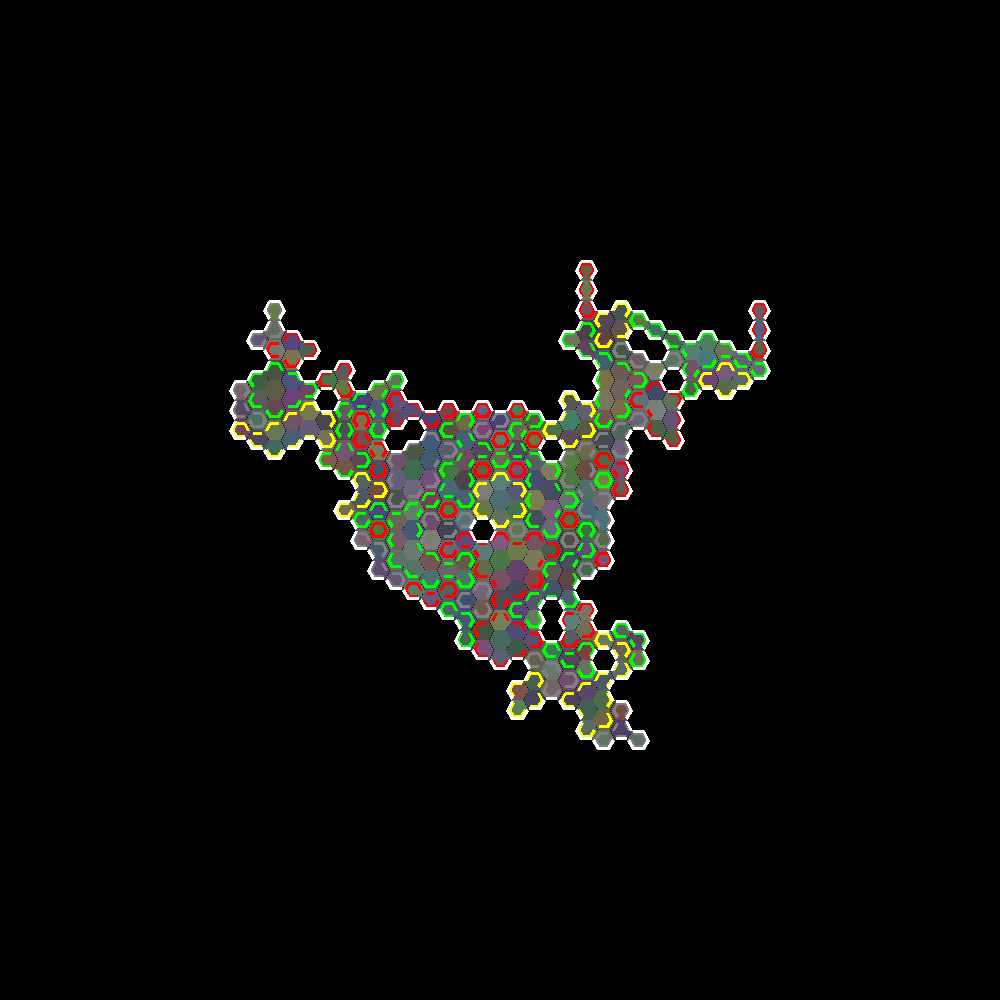

In [32]:
terrain_tiles = Tile(tile_list=[
    Tile(hex_list=[k for k, v in terrain_from_hex.items() if v == Terrain.plains], rgb=(0,255,0)),
    Tile(hex_list=[k for k, v in terrain_from_hex.items() if v == Terrain.farmlands], rgb=(255,255,0)),
    Tile(hex_list=[k for k, v in terrain_from_hex.items() if v == Terrain.hills], rgb=(255,0,0)),
    Tile(hex_list=[k for k, v in terrain_from_hex.items() if v == Terrain.mountains], rgb=(128,128,128)),
])
bdc = BorderDoodler(terrain_tiles, size=(1000,1000), radius=10, depth=2)
bdc.im

In [34]:
ocean, wastelands = find_ocean_and_wastelands(continent)

In [35]:
wastelands

[[Cube(10, 1, -11)],
 [Cube(-6, 6, 0), Cube(-5, 6, -1)],
 [Cube(8, 4, -12), Cube(9, 3, -12)],
 [Cube(3, 1, -4)],
 [Cube(-10, 10, 0)],
 [Cube(3, -7, 4), Cube(3, -8, 5)],
 [Cube(6, -11, 5)],
 [Cube(-1, -1, 2)]]

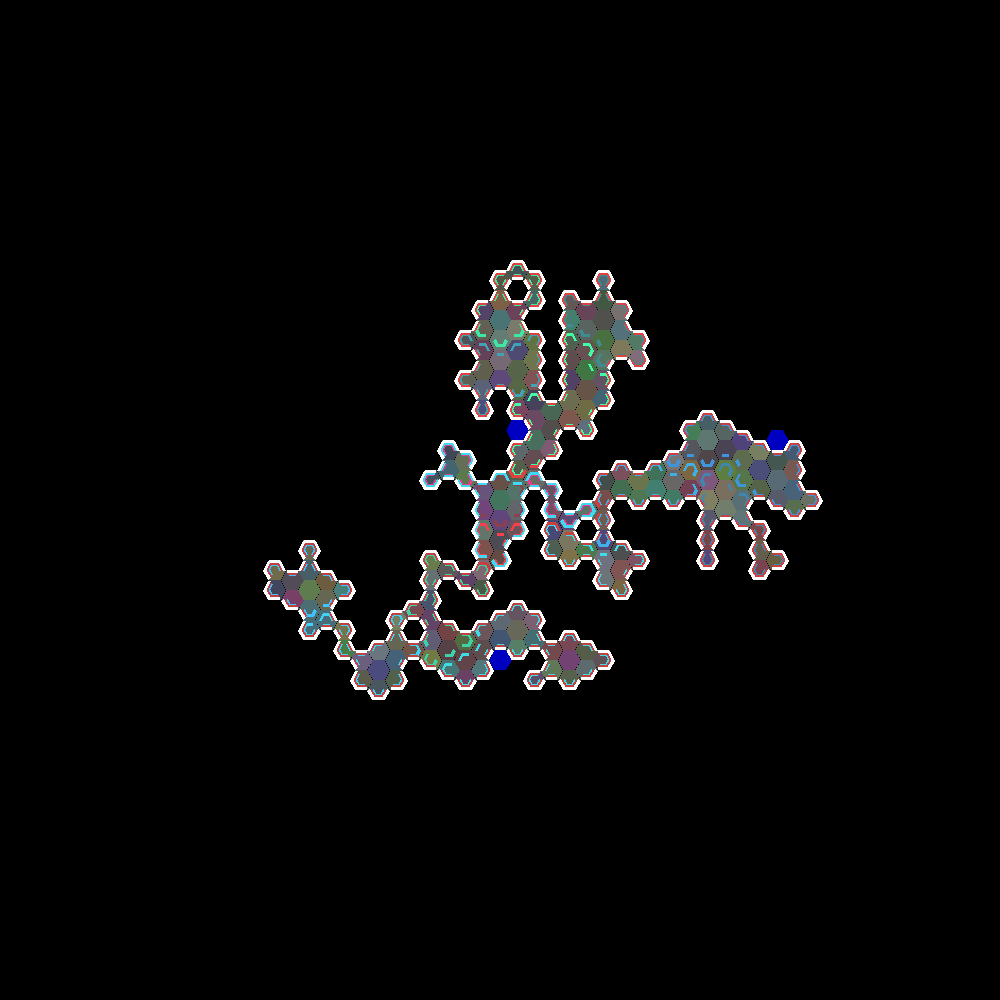

In [6]:
num_kingdoms = 3
center = make_original_center_duchy(size_list=CENTER_SIZE_LIST)
kingdoms = [make_kingdom(size_list = KINGDOM_SIZE_LIST) for _ in range(num_kingdoms)]
cen_nbrs = center.neighbors()
k_r_bnds = [kingdom.relative_boundary() for kingdom in kingdoms]
port_locs = [kingdom.relative_water_list()[0] for kingdom in kingdoms]
continent = Tile(hex_list=[])
continent.add_tile(center)
for k_idx in range(3):
    move_kingdom_into_place(continent, kingdoms[k_idx], cen_nbrs)
continent.rectify()
bdc = BorderDoodler(continent, size=(1000,1000),radius=10, depth=2)
bdc.im

In [18]:
assigned = continent.real_total_list()
c_dist = calculate_distances(center, assigned, 10)[0]
k_dists = calculate_distances(kingdoms[:3], assigned, sum(BORDER_SIZE_LIST))
allowable = [el for el in k_dists[a_idx] if el in k_dists[b_idx]]
ranking = {el: c_dist[el] if el in c_dist else el.mag() for el in allowable}
size_list = BORDER_SIZE_LIST
a_idx = 0
b_idx = 1
a_dist = k_dists[a_idx]
b_dist = k_dists[b_idx]
size = sum(size_list)
possible_tiles = []
allowable_chunks = get_chunks(allowable)
chunk = allowable_chunks.pop(0)
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, 999), el) for el in chunk])]
a_adj = [el for el in sorted_chunk if a_dist[el] == 1]
b_adj = [el for el in sorted_chunk if b_dist[el] == 1]

In [29]:
allowable_chunks = get_chunks(allowable)

In [31]:
print(len(allowable))
allowable_chunks = get_chunks(allowable)
possible_tiles = []
tile_split = [[]] * len(size_list)
chunk = allowable_chunks.pop(0)
if len(chunk) < size:
    print("continue")  # We can't make one, so don't bother trying.
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, 999), el) for el in chunk])]
a_adj = [el for el in sorted_chunk if a_dist[el] == 1]
b_adj = [el for el in sorted_chunk if b_dist[el] == 1]
if len(a_adj) == 0 or len(b_adj) == 0:
    print("continue")  # We're not going to get adjacency to both.
# There are two main cases to handle: when they're close enough that the counties might 
# overlap or cut each other off, and when they're far enough that the main challenge is
# finding a path that can reach.
closest_a = a_adj[0]
# Pathing version:
if b_dist[closest_a] > 4:
    print("branch a")
    snake = [closest_a]
    disconnected = True
    while disconnected:
        closer_nbrs = [el for el in snake[-1].neighbors() if el in chunk and b_dist.get(el,999) < b_dist[snake[-1]]]
        if len(closer_nbrs) == 0:
            break
        sorted_nbrs = [pair[1] for pair in sorted([(ranking.get(el, 999), el) for el in closer_nbrs])]
        snake.append(sorted_nbrs[0])
        if b_dist[snake[-1]] == 1:
            disconnected = False
    print(disconnected, len(snake))
    if not disconnected and len(snake) >= size:  # I'm not sure why I thought this case was possible.
        overage = len(snake) - size
        if a_dist[snake[overage]] == 1:
            snake = snake[overage:]
            possible_tiles, allowable_chunks = salvage_remainder(possible_tiles, duchy_from_snake(snake, size_list), chunk, allowable_chunks, size)
    elif not disconnected:  # We have a valid snake, but too few.
        underage = size - len(snake)
        extendable = True
        while underage > 0 and extendable:
            start_nbrs = [el for el in snake[0].neighbors() if el in chunk and ranking.get(el,999) <= ranking.get(snake[0]) and el not in snake]
            if len(start_nbrs) > 0:
                snake.insert(0,random.choice(start_nbrs))
                underage -= 1
            if underage > 0:
                end_nbrs = [el for el in snake[-1].neighbors() if el in chunk and ranking.get(el,999) <= ranking.get(snake[-1]) and el not in snake]
                if len(end_nbrs) > 0:
                    snake.append(random.choice(end_nbrs))
                    underage -= 1
            if len(start_nbrs) == 0 and len(end_nbrs) == 0:
                # Now we have to grow in the middle. 
                extendable = False
        if underage == 0:
            possible_tiles, allowable_chunks = salvage_remainder(possible_tiles, duchy_from_snake(snake, size_list), chunk, allowable_chunks, size)
        else:
            duchy = Tile(rgb=d_col(), hex_list=[])
            for c_size in size_list:
                duchy.add_tile(Tile(rgb=c_col(), hex_list=[]))
            assigned = []
            ind = 0
            while len(snake) > 0 and underage > 0 and ind < len(size_list):
                el_nbrs = [el for el in snake[0].neighbors() if el in chunk and el not in snake and el not in assigned]
                assigned.append(snake.pop(0))
                duchy.tile_list[ind].hex_list.append(assigned[-1])
                if len(duchy.tile_list[ind].hex_list) == size_list[ind]:
                    ind += 1
                    if ind == len(size_list):
                        break
                if len(el_nbrs) > 0:
                    num_to_take = min(underage, size_list[ind] - len(duchy.tile_list[ind].hex_list))
                    added_now = random.sample(el_nbrs, min(num_to_take,len(el_nbrs)))
                    assigned.extend(added_now)
                    duchy.tile_list[ind].hex_list.extend(added_now)
                    if len(duchy.tile_list[ind].hex_list) == size_list[ind]:
                        ind += 1
                    # Note that we could keep going here, and check the neighbors of these neighbors, but I'm going to skip this for now.
            if underage == 0:
                if len(size_list) > 2:
                    duchy.tile_list.insert(0,duchy.tile_list.pop(1))
                possible_tiles, allowable_chunks = salvage_remainder(possible_tiles, duchy, chunk, allowable_chunks, size)
# Clumpy version
else:
    print("branch b")
    # TODO: Fix this!
    possible_tiles, allowable_chunks = salvage_remainder(possible_tiles, duchy_from_snake(sorted_chunk[:size], size_list), chunk, allowable_chunks, size)
    # shared = [el for el in a_adj if el in b_adj]
    # if len(shared) > 0:
    #     # At least one of them touches both, and so should be the capital.
    #     duchy = Tile(rgb=d_col(), hex_list=[])
    #     capital_county_hexes = [shared[0]]
    #     poss_nbrs = set()
    #     # Attempt to grab shared first.
    #     while len(capital_county_hexes) < size_list[0]:
    #         poss_nbrs.union([el for el in capital_county_hexes[-1].neighbors() if el in shared and el not in capital_county_hexes])
    #         if len(poss_nbrs) == 0:
    #             break
    #         capital_county_hexes.append(shared_nbrs.pop())
    #     # Now grab anything to make it big enough.
    #     poss_nbrs = {nel for nel in el.neighbors() for el in capital_county_hexes if nel in sorted_chunk and nel not in capital_county_hexes}
    #     while len(capital_county_hexes) < size_list[0]:
    #         capital_county_hexes.append(poss_nbrs.pop())
    #         poss_nbrs.union([el for el in capital_county_hexes[-1].neighbors() if el in sorted_chunk and el not in capital_county_hexes])
    #         if len(poss_nbrs) == 0:
    #             break
    #     if len(capital_county_hexes) == size_list[0]:
    #         duchy.tile_list.append(Tile(rgb=c_col(), hex_list=capital_county_hexes))
    #     else:
    #         break
    #     # Time to do the other counties

    # else:
    #     duchy = Tile(rgb=d_col(), hex_list=[])
print(len(possible_tiles))
print(len(allowable_chunks))

242
branch a
False 5
0
0


In [38]:
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, el.mag()) + a_dist[el] + b_dist[el], el) for el in chunk])]

In [41]:
assigned = continent.real_total_list()

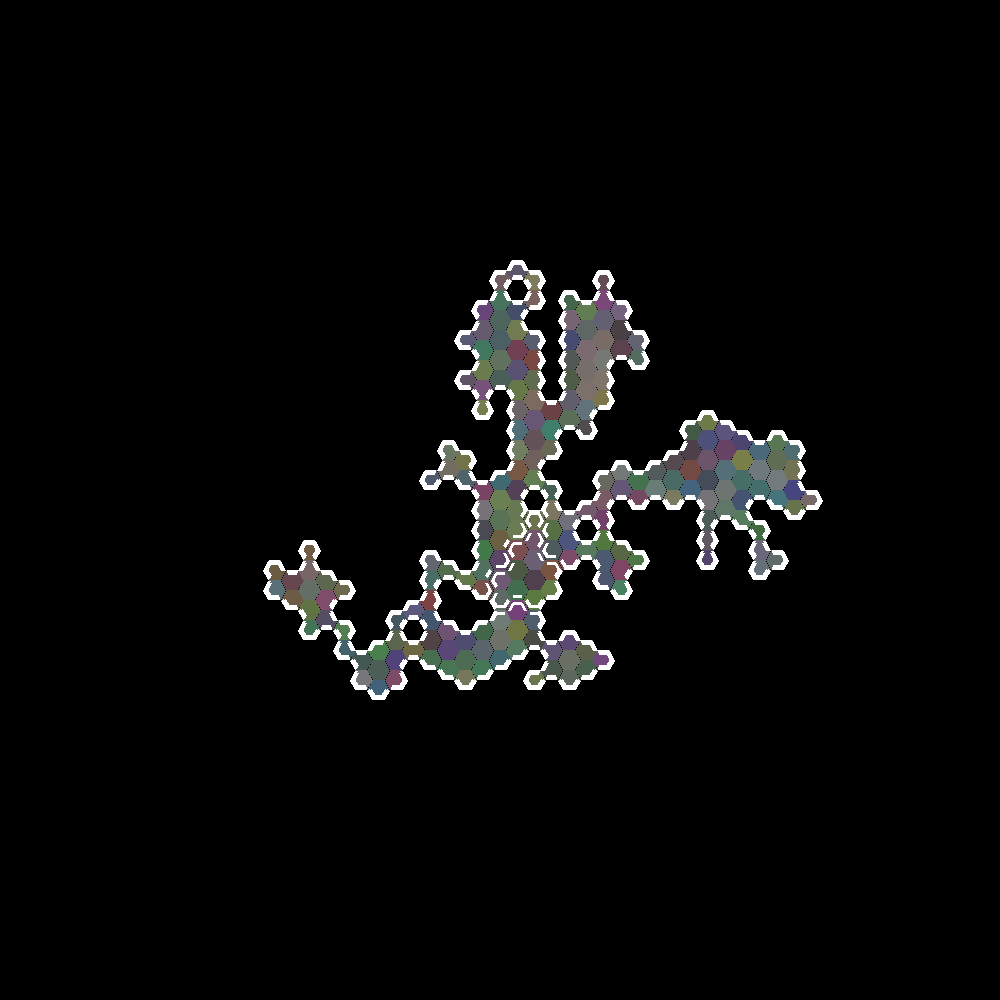

In [48]:
# assigned = continent.real_total_list()[:22+61+61+61]
# c_dist = calculate_distances(continent.tile_list[0], assigned, 10)[0]
# k_dists = calculate_distances(kingdoms[:3], assigned, sum(BORDER_SIZE_LIST))
a_idx = 0
b_idx = 1
a_dist = k_dists[a_idx]
b_dist = k_dists[b_idx]
allowable = [el for el in k_dists[a_idx] if el in k_dists[b_idx]]
allowable_chunks = get_chunks(allowable)
chunk = allowable_chunks.pop(0)
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, el.mag()) + a_dist[el] + b_dist[el], el) for el in chunk])]
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), Tile(hex_list=sorted_chunk[:12])]), size=(1000,1000), radius=10)
bdc.im

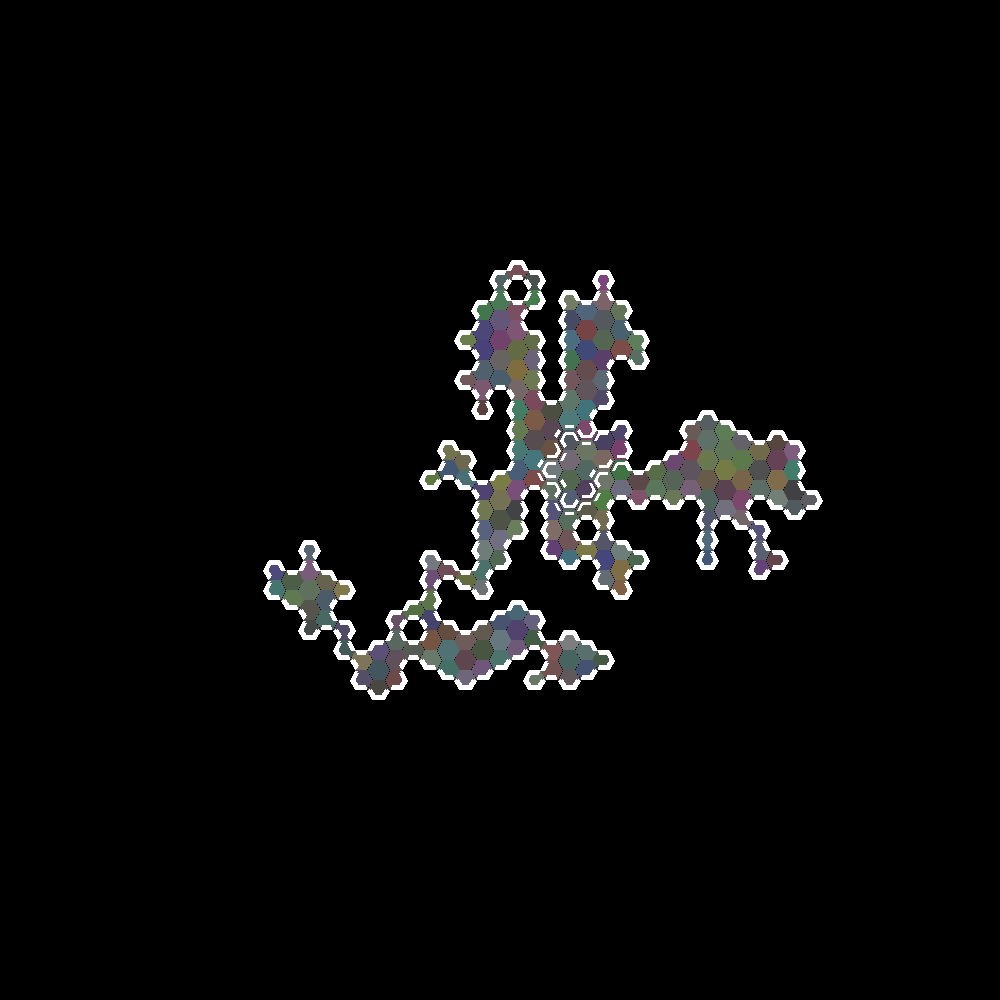

In [50]:
# assigned = continent.real_total_list()[:22+61+61+61]
# c_dist = calculate_distances(continent.tile_list[0], assigned, 10)[0]
# k_dists = calculate_distances(kingdoms[:3], assigned, sum(BORDER_SIZE_LIST))
a_idx = 0
b_idx = 2
a_dist = k_dists[a_idx]
b_dist = k_dists[b_idx]
allowable = [el for el in k_dists[a_idx] if el in k_dists[b_idx]]
allowable_chunks = get_chunks(allowable)
chunk = allowable_chunks.pop(0)
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, el.mag()) + a_dist[el] + b_dist[el], el) for el in chunk])]
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), Tile(hex_list=sorted_chunk[:12])]), size=(1000,1000), radius=10)
bdc.im

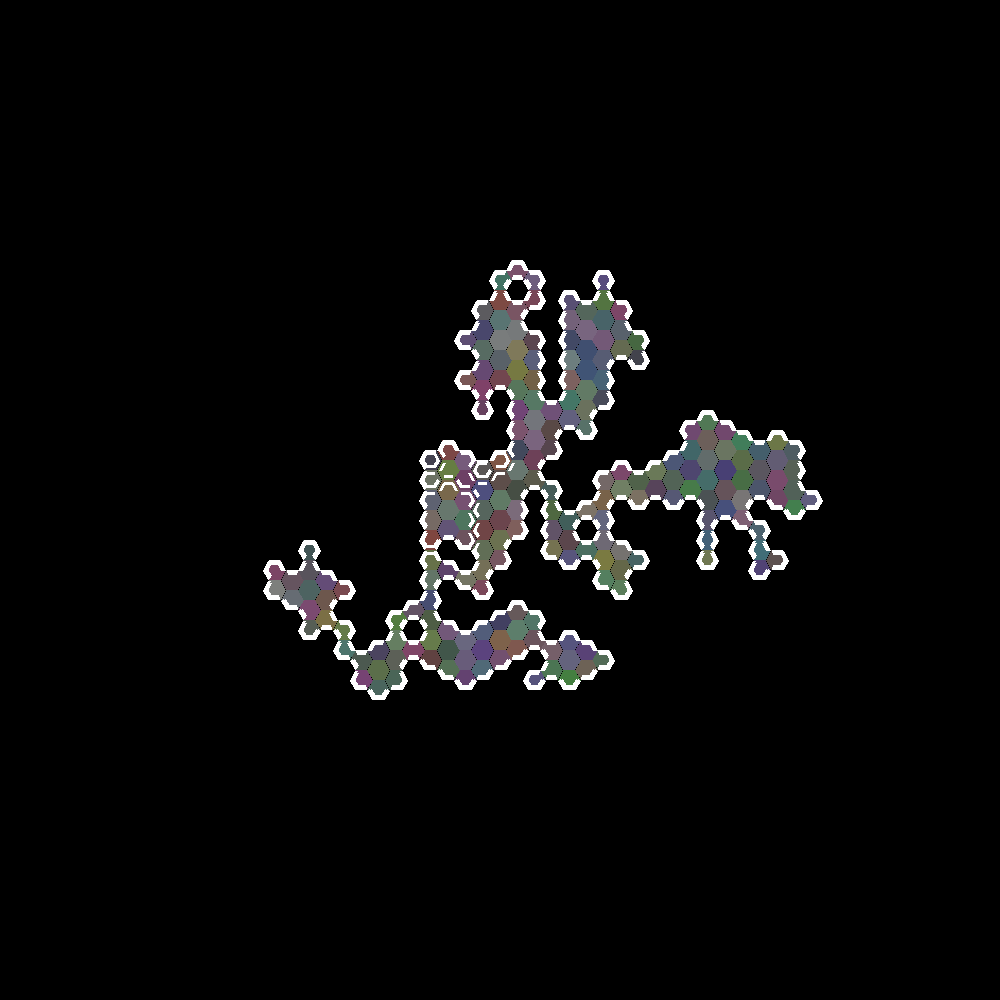

In [51]:
# assigned = continent.real_total_list()[:22+61+61+61]
# c_dist = calculate_distances(continent.tile_list[0], assigned, 10)[0]
# k_dists = calculate_distances(kingdoms[:3], assigned, sum(BORDER_SIZE_LIST))
a_idx = 1
b_idx = 2
a_dist = k_dists[a_idx]
b_dist = k_dists[b_idx]
allowable = [el for el in k_dists[a_idx] if el in k_dists[b_idx]]
allowable_chunks = get_chunks(allowable)
chunk = allowable_chunks.pop(0)
sorted_chunk = [pair[1] for pair in sorted([(ranking.get(el, el.mag()) + a_dist[el] + b_dist[el], el) for el in chunk])]
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), Tile(hex_list=sorted_chunk[:12])]), size=(1000,1000), radius=10)
bdc.im

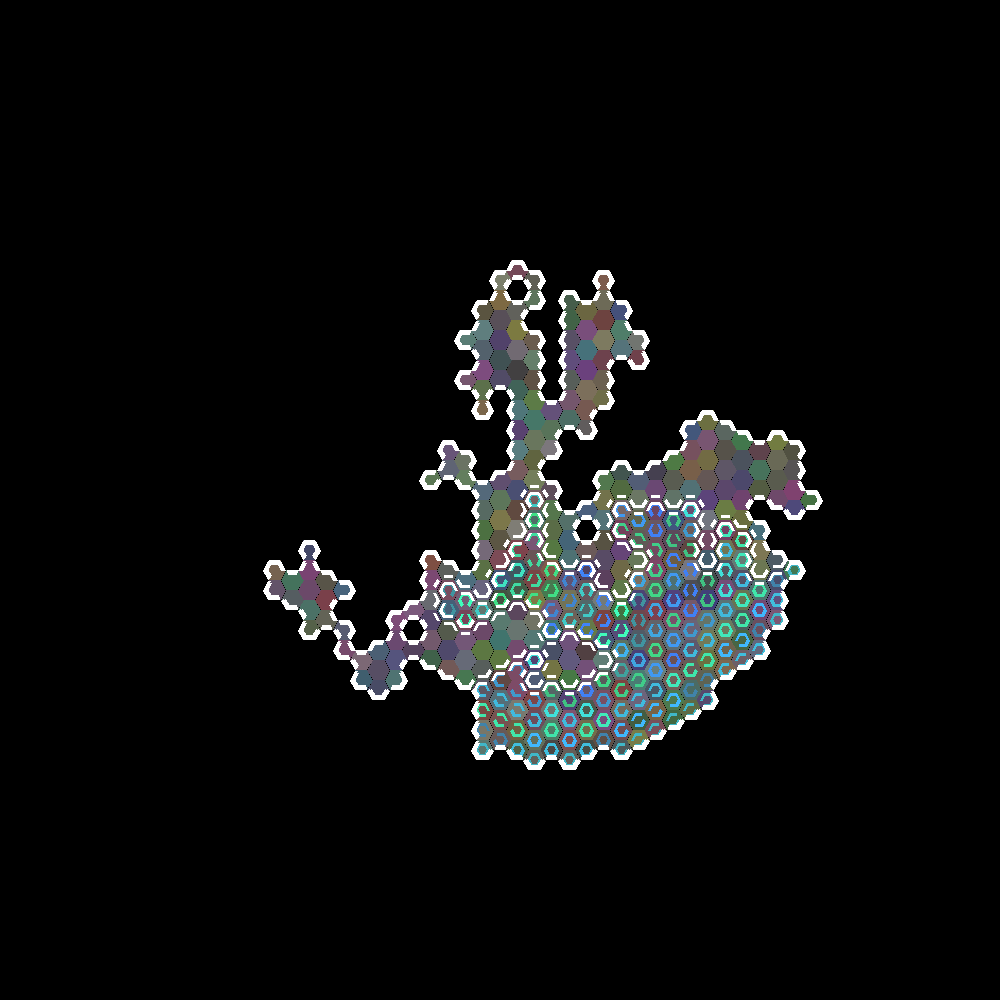

In [43]:
totdist = Tile(hex_list=[])
for dist in range(30):
    totdist.tile_list.append(Tile(rgb=d_col(), hex_list=[k for k in allowable if a_dist[k] + b_dist[k] + c_dist.get(k, k.mag()) == dist]))

bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), totdist]), size=(1000,1000), radius=10)
bdc.im

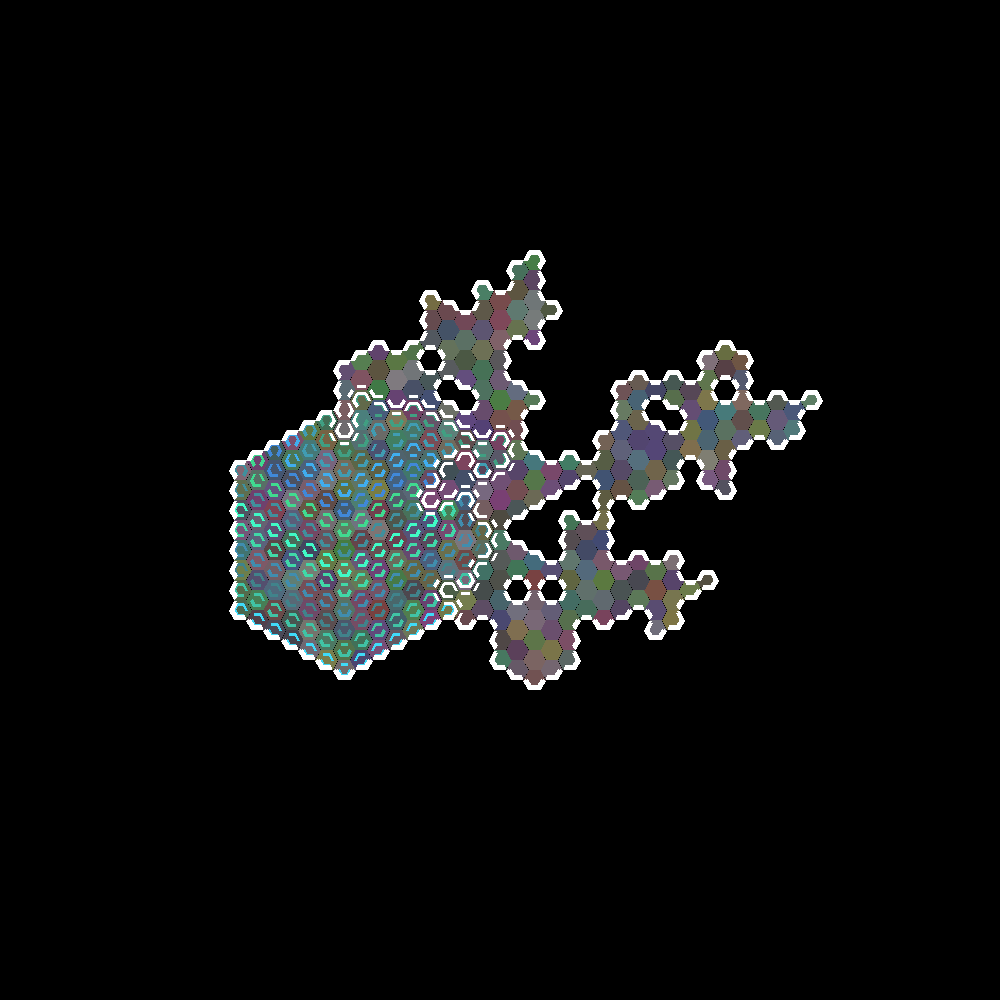

In [28]:
b_allowable = Tile(hex_list=[])
for dist in sorted(set(k_dists[b_idx].values())):
    b_allowable.tile_list.append(Tile(rgb=d_col(), hex_list=[k for k,v in k_dists[b_idx].items() if v == dist and k in allowable]))

bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), b_allowable]), size=(1000,1000), radius=10)
bdc.im

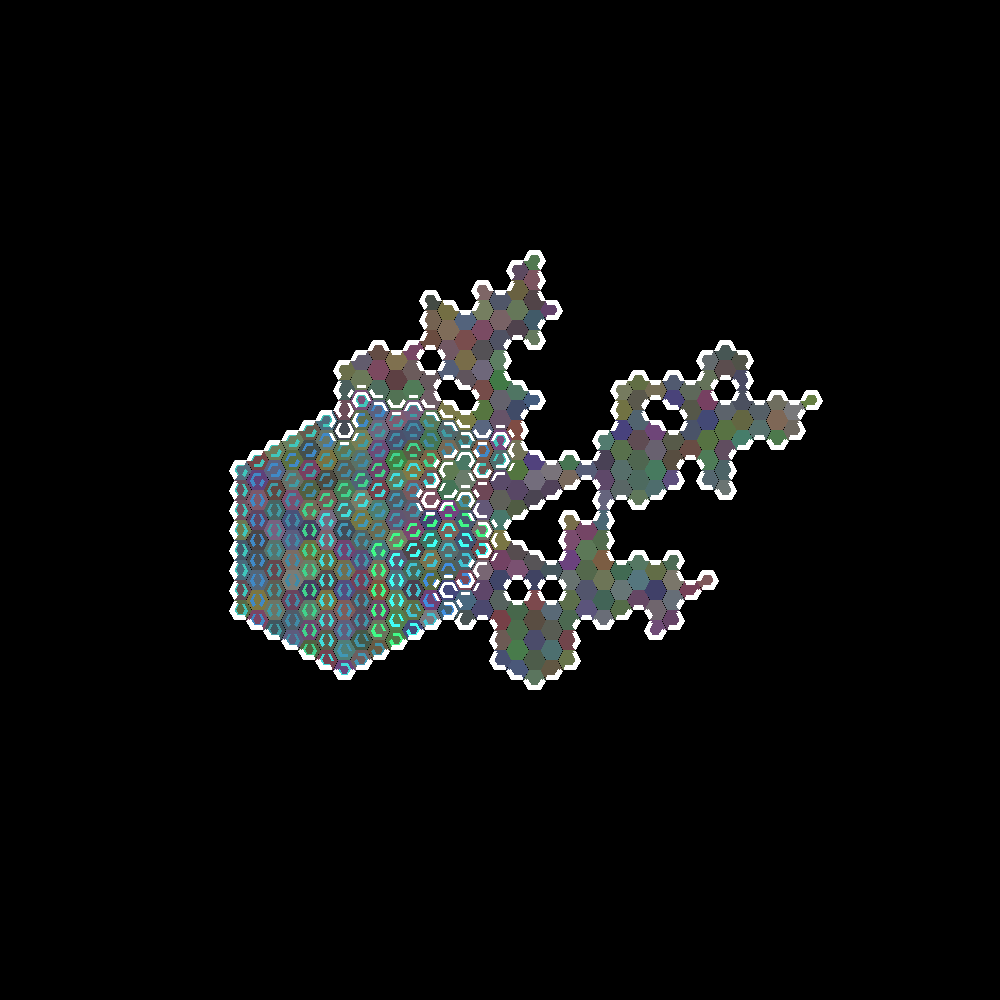

In [29]:
a_allowable = Tile(hex_list=[])
for dist in sorted(set(k_dists[a_idx].values())):
    a_allowable.tile_list.append(Tile(rgb=d_col(), hex_list=[k for k,v in k_dists[a_idx].items() if v == dist and k in allowable]))

bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), a_allowable]), size=(1000,1000), radius=10)
bdc.im

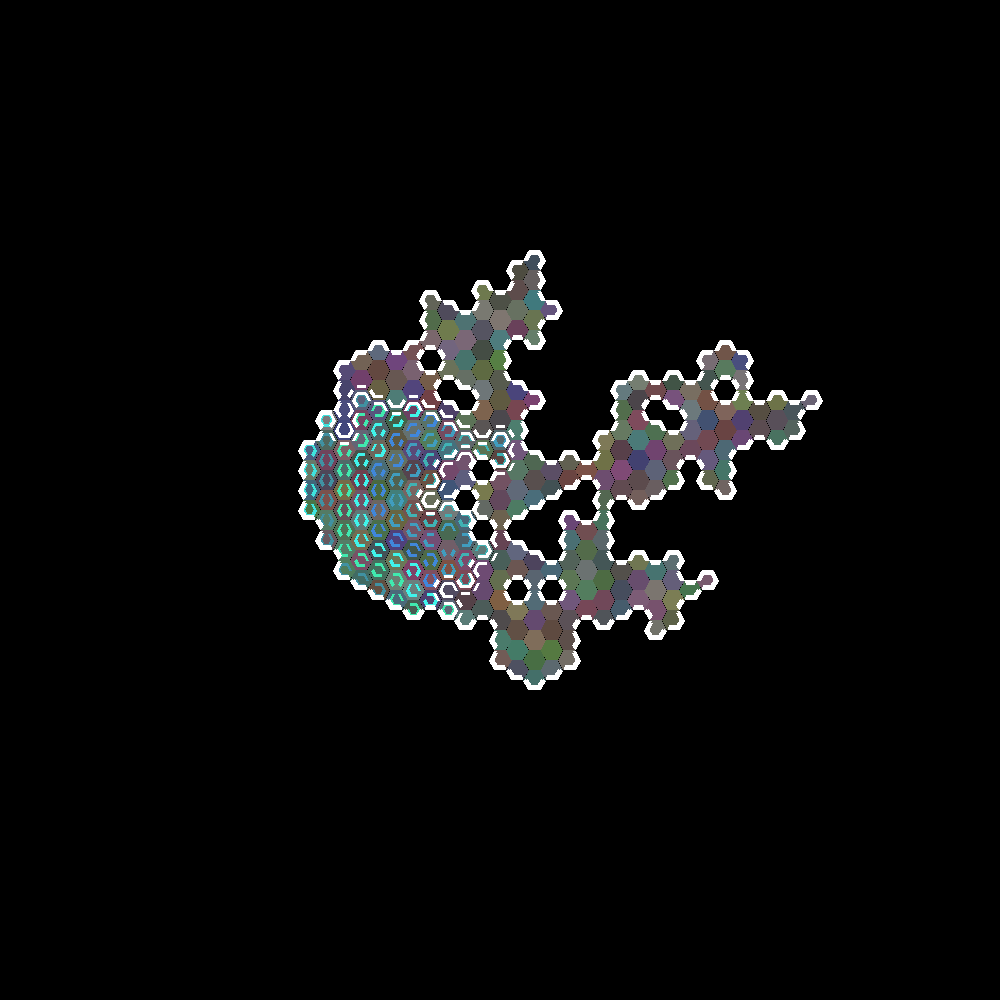

In [41]:
a_allowable = Tile(hex_list=[])
for dist in sorted(set(c_dist.values())):
    a_allowable.tile_list.append(Tile(rgb=d_col(), hex_list=[k for k,v in c_dist.items() if v == dist and k in allowable]))

bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), a_allowable]), size=(1000,1000), radius=10)
bdc.im

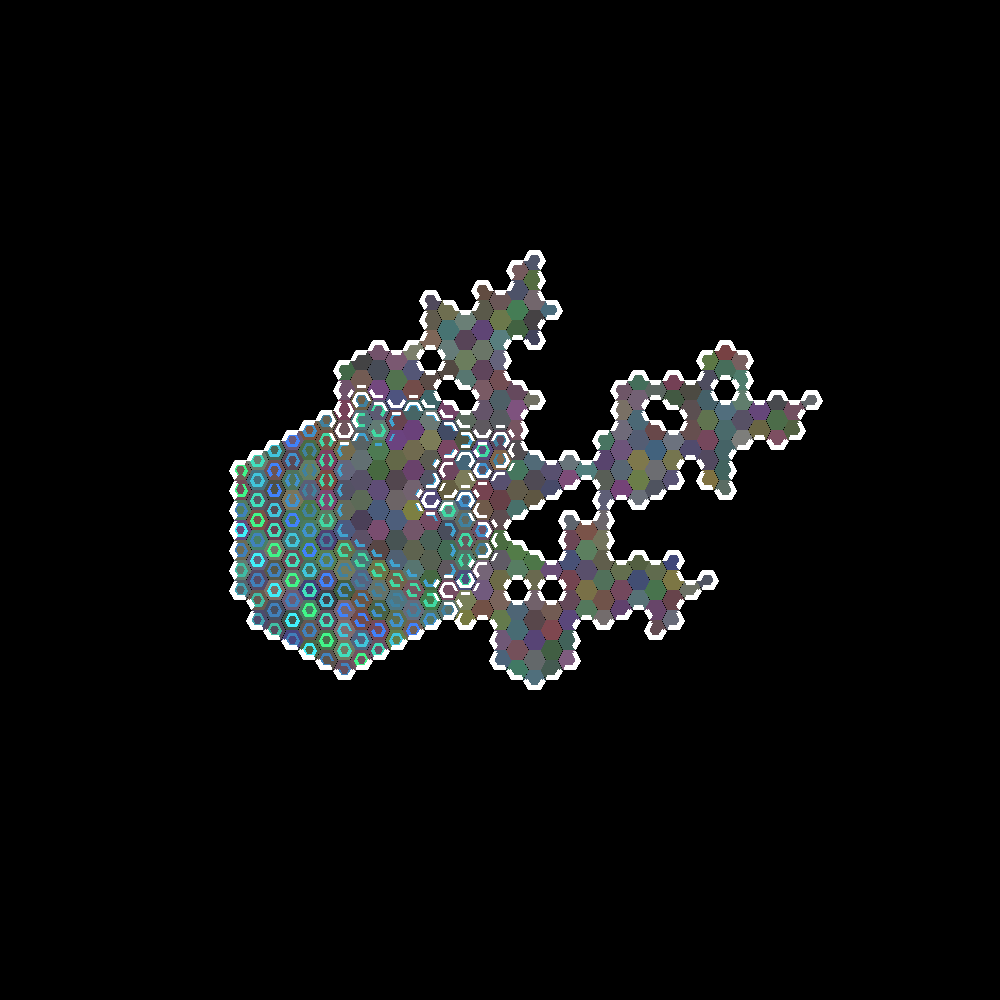

In [32]:
sum_allowable = Tile(hex_list=[])
for dist in range(0, 2 * sum(BORDER_SIZE_LIST)):
    sum_allowable.tile_list.append(Tile(rgb=d_col(),
                                        hex_list=[k for k in allowable if k_dists[a_idx][k] + k_dists[b_idx][k] == dist]))
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), sum_allowable]), size=(1000,1000), radius=10)
bdc.im

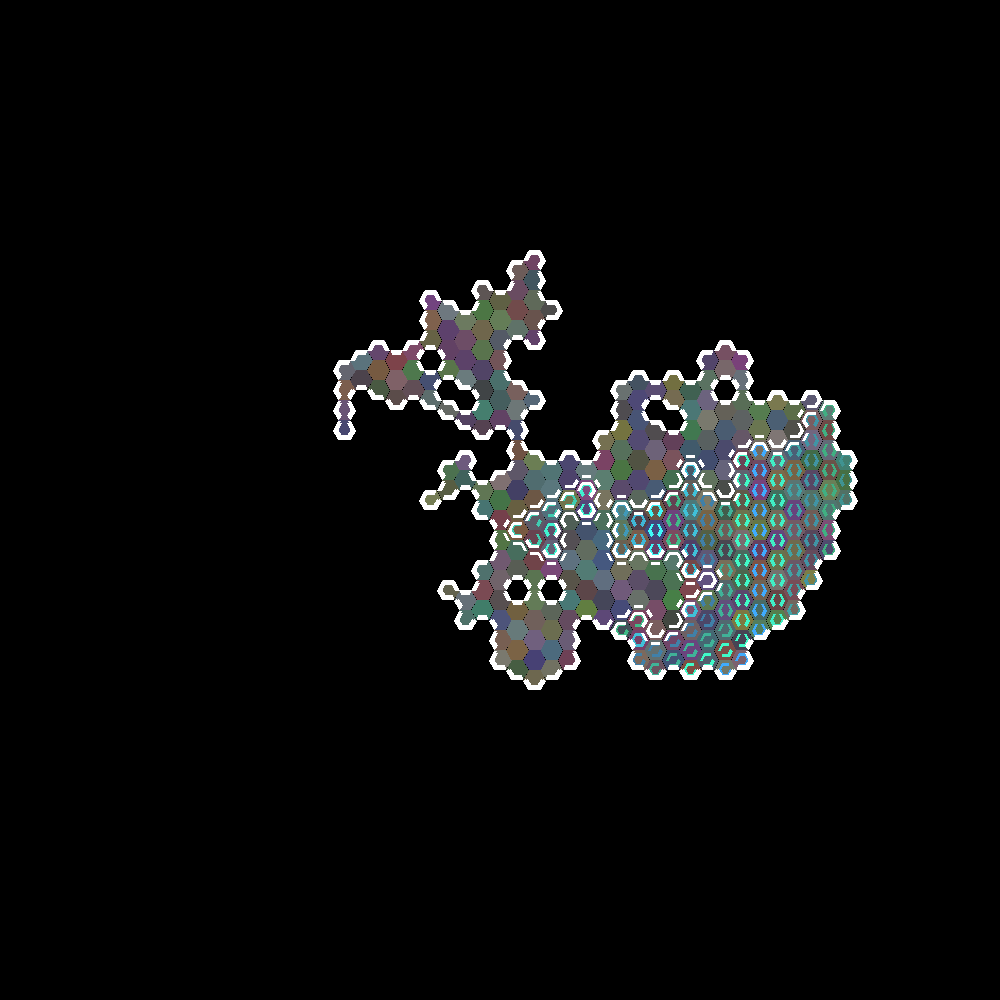

In [85]:
a_idx = 0
b_idx = 2
allowable = [el for el, v in k_dists[a_idx].items() if k_dists[b_idx].get(el,999) + v <= sum(BORDER_SIZE_LIST) + 1]
sum_allowable = Tile(hex_list=[])
for dist in range(0, 20):
    sum_allowable.tile_list.append(Tile(rgb=d_col(),
                                        hex_list=[k for k in allowable if k_dists[a_idx][k] + k_dists[b_idx][k] == dist]))
ranking = {el: c_dist[el] if el in c_dist else el.mag() for el in allowable}
c_allowable = Tile(hex_list=[])
for dist in sorted(set(ranking.values())):
    c_allowable.tile_list.append(Tile(rgb=d_col(), hex_list=[k for k,v in ranking.items() if v == dist and k in allowable]))
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=assigned), c_allowable]), size=(1000,1000), radius=10)
bdc.im

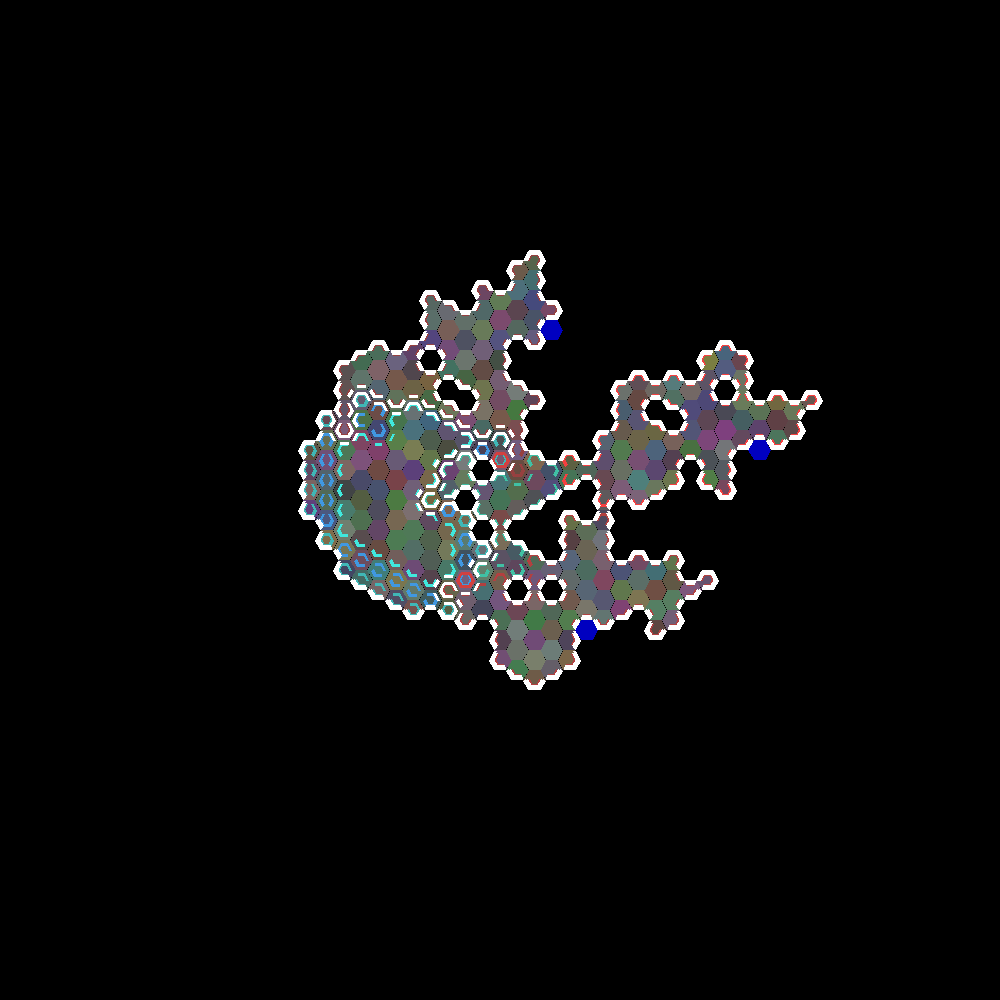

In [77]:
chunk = allowable
a_dist = k_dists[a_idx]
b_dist = k_dists[b_idx]
sorted_chunk = [pair[1] for pair in sorted([(c_dist.get(el, 999), el) for el in chunk])]
a_adj = [el for el in chunk if a_dist[el] == 1]
b_adj = [el for el in chunk if b_dist[el] == 1]
closest_a = [el for el in sorted_chunk if el in a_adj][0]
print(closest_a)
closest_b = [el for el in sorted_chunk if el in b_adj][0]
print(closest_b)
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=[], tile_list=continent.tile_list[:4]), sum_allowable, Tile(rgb=k_col(), hex_list=[closest_a,closest_b])]), size=(1000,1000), radius=10, depth=2)
bdc.im

In [57]:
ranking = c_dist
snake = [closest_a]
disconnected = True
while disconnected:
    closer_nbrs = [el for el in snake[-1].neighbors() if el in chunk and b_dist.get(el,999) < b_dist[snake[-1]]]
    if len(closer_nbrs) == 0:
        break
    sorted_nbrs = [pair[1] for pair in sorted([(ranking.get(el, 999), el) for el in closer_nbrs])]
    snake.append(sorted_nbrs[0])
    if b_dist[snake[-1]] == 1:
        disconnected = False

In [71]:
start_nbrs = [el for el in snake[0].neighbors() if el in chunk and ranking.get(el,999) <= ranking.get(snake[0]) and el not in snake]
start_nbrs

[]

In [75]:
end_nbrs = [el for el in snake[-1].neighbors() if el in chunk and ranking.get(el,999) <= ranking.get(snake[-1]) and el not in snake]
end_nbrs

[Cube(0, 2, -2)]

In [73]:
snake.append(random.choice(end_nbrs))

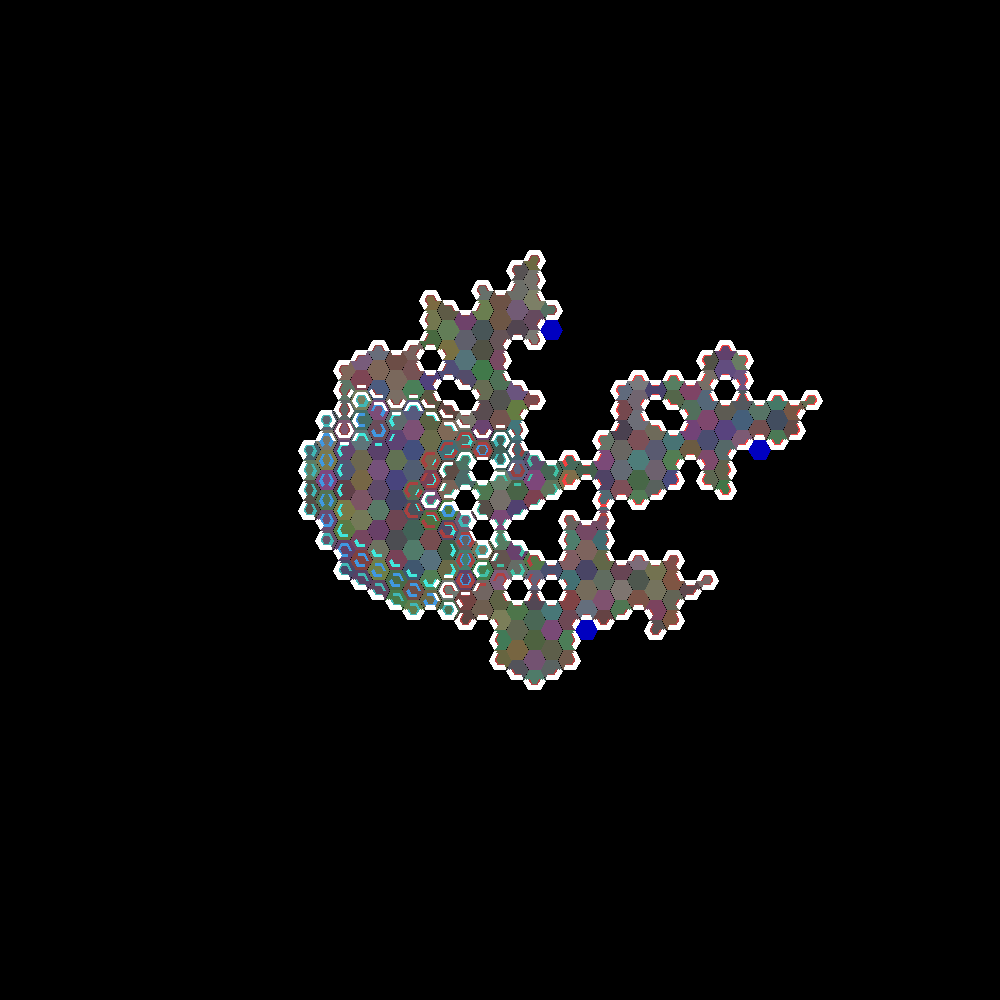

In [74]:
bdc = BorderDoodler(Tile(tile_list=[Tile(hex_list=[], tile_list=continent.tile_list[:4]), sum_allowable, Tile(rgb=k_col(), hex_list=snake)]), size=(1000,1000), radius=10, depth=2)
bdc.im

In [88]:
random.sample([1,2,3],2)

[3, 1]

In [56]:
import os
def make_dot_mod(file_dir, mod_name, mod_disp_name):
    '''Build the basic mod details file.'''
    outer = "name = \"{}\"\npath = \"mod/{}\"\n".format(mod_disp_name, mod_name)
    inner = "name = \"{}\"\n".format(mod_disp_name)
    shared = "user_dir = \"{}\"\n".format(mod_name)
    shared += "tags = {\n\t\"Total Conversion\"\n}\n"
    replace_paths = ["common/landed_titles", "map_data"] #"common/bookmarks", "common/cultures", "common/dynasties", 
                        #"common/offmap_powers", "history/characters", "history/offmap_powers", "history/provinces",
                        #"history/technology", "history/titles", "history/wars"]
    shared += "replace_path = \"" + "\"\nreplace_path = \"".join(replace_paths)+"\""
    os.makedirs(os.path.join(file_dir, mod_name), exist_ok=True)
    with open(os.path.join(file_dir,"{}.mod".format(mod_name)),'w') as f:
        f.write(outer + shared)
    with open(os.path.join(file_dir, mod_name, "descriptor.mod".format(mod_name)),'w') as f:
        f.write(inner + shared)

In [15]:
make_dot_mod('C:\\Users\\Vaniver\\Documents\\Paradox Interactive\\Crusader Kings III\\mod', 'map_test','Map Test')

user_dir = "map_test"
tags = {
	"Total Conversion"
}
replace_path = "common/landed_titles"
replace_path = "map_data"


In [17]:
import random

In [18]:
random.seed(42)

In [6]:
k = continent.tile_list[4]

In [7]:
len(k.relative_hex_list())

12

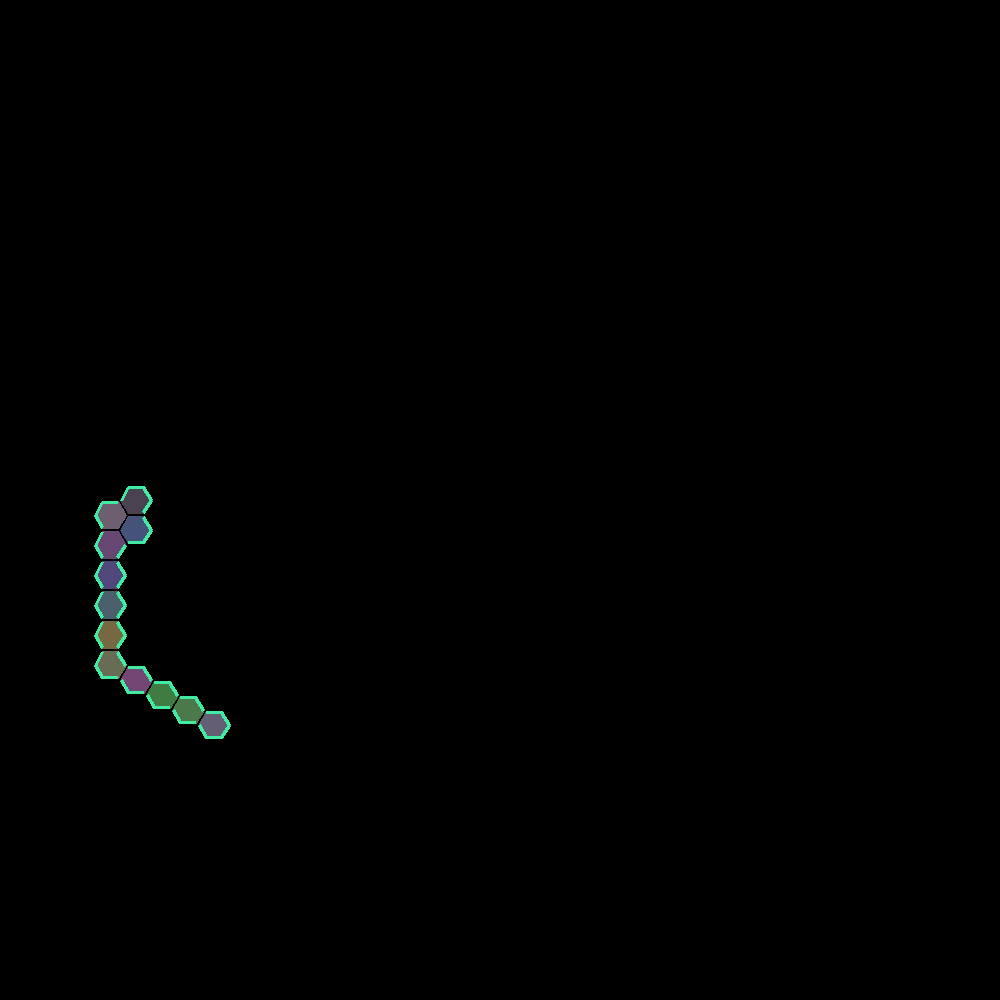

In [168]:
bdk = BorderDoodler(continent.tile_list[15],
                    size=(1000,1000),radius=15)
bdk.im

In [154]:
def check_contig(split, nbr_dict):
    """Checks that each of the lists of hexs in split is contiguous."""
    for group in split:
        never_visited = set(group)
        to_visit = set()
        if len(never_visited) == 0:
            continue
        to_visit.add(never_visited.pop())
        while len(to_visit) > 0:
            this_one = to_visit.pop()
            for el in nbr_dict[this_one]:
                if el in never_visited:
                    never_visited.remove(el)
                    to_visit.add(el)
        if len(never_visited) > 0:
            return False
    return True

In [144]:
def divide_into_counties(tile, size_list):
    hex_list = [el for el in tile.hex_list]
    assert len(hex_list) == sum(size_list)
    counties = [[] for _ in size_list]
    num_left = [el for el in size_list]
    nbr_dict = {}
    for el in hex_list:
        nbr_dict[el] = [nel for nel in el.neighbors() if nel in hex_list]
    nn1 = [el for el in hex_list if len(nbr_dict[el]) == 1]
    idx = 0
    while len(nn1) > 0 and idx < len(size_list):
        single = nn1.pop()
        hex_list.remove(single)
        counties[idx].append(single)
        num_left[idx] -= 2
        nbr = [el for el in nbr_dict[single] if el in hex_list][0]
        counties[idx].append(nbr)
        hex_list.remove(nbr)
        while len(nbr_dict[nbr]) == 2 and num_left[idx] > 0:
            nbr = [el for el in nbr_dict[nbr] if el not in counties[idx]][0]
            counties[idx].append(nbr)
            hex_list.remove(nbr)
            num_left[idx] -= 1
        if len(nbr_dict[nbr]) == 2 and num_left[idx] == 0:
            nn1.append([el for el in nbr_dict[nbr] if el not in counties[idx]][0])
        idx += 1
    picks = [el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]
    done = False
    while not done:
        this_split = []
        el_idx = 0
        for idx in range(len(size_list)):
            this_split.append(counties[idx])
            for _ in range(num_left[idx]):
                this_split[idx].append(hex_list[el_idx])
                el_idx += 1
        done = check_contig(this_split, nbr_dict)
    tile.hex_list = []
    tile.tile_list = [Tile(hex_list=hl, rgb=c_col()) for hl in this_split]

In [158]:
start_time = time.time()
for tl in continent.tile_list:
    if len(tl.relative_hex_list()) == 12:
        # divide_into_counties(tl, BORDER_SIZE_LIST)
        print(len(tl.tile_list))
print(time.time() - start_time)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.003988742828369141


In [172]:
np.argmin([3,3])

0

In [169]:
start_time = time.time()
tl = continent.tile_list[15]
divide_into_counties(tl, BORDER_SIZE_LIST)
print(time.time() - start_time)
tl.hex_list = tl.relative_hex_list()
tl.tile_list = []

0.0009965896606445312


In [147]:
tl.hex_list = tl.relative_hex_list()
tl.tile_list = []

In [148]:
tile = tl
size_list = BORDER_SIZE_LIST
hex_list = [el for el in tile.hex_list]
assert len(hex_list) == sum(size_list)
counties = [[] for _ in size_list]
num_left = [el for el in size_list]
nbr_dict = {}
for el in hex_list:
    nbr_dict[el] = [nel for nel in el.neighbors() if nel in hex_list]
nn1 = [el for el in hex_list if len(nbr_dict[el]) == 1]
idx = 0
while len(nn1) > 0 and idx < len(size_list):
    single = nn1.pop()
    hex_list.remove(single)
    counties[idx].append(single)
    num_left[idx] -= 2
    nbr = [el for el in nbr_dict[single] if el in hex_list][0]
    counties[idx].append(nbr)
    hex_list.remove(nbr)
    while len(nbr_dict[nbr]) == 2 and num_left[idx] > 0:
        nbr = [el for el in nbr_dict[nbr] if el not in counties[idx]][0]
        counties[idx].append(nbr)
        hex_list.remove(nbr)
        num_left[idx] -= 1
    if len(nbr_dict[nbr]) == 2 and num_left[idx] == 0:
        nn1.append([el for el in nbr_dict[nbr] if el not in counties[idx]][0])
    idx += 1
picks = [el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]
done = False
while not done:
    this_split = []
    el_idx = 0
    for idx in range(len(size_list)):
        this_split.append(counties[idx])
        for _ in range(num_left[idx]):
            this_split[idx].append(hex_list[el_idx])
            el_idx += 1
    done = check_contig(this_split, nbr_dict)

In [150]:
this_split

[[Cube(6, -2, -4), Cube(5, -1, -4), Cube(5, 0, -5), Cube(5, 1, -6)],
 [Cube(4, 3, -7), Cube(5, 2, -7), Cube(4, 2, -6), Cube(6, 0, -6)],
 [Cube(7, -1, -6), Cube(6, 1, -7), Cube(5, 3, -8), Cube(7, 0, -7)]]

In [155]:
check_contig(this_split, nbr_dict)

False

In [153]:
group = this_split[0]
never_visited = set(group)
to_visit = set()
to_visit.add(never_visited.pop())


In [119]:
this_split = []
el_idx = 0
for idx in range(len(size_list)):
    this_split.append(counties[idx])
    for _ in range(num_left[idx]):
        this_split[idx].append(hex_list[el_idx])
        el_idx += 1


In [120]:
this_split

[[Cube(-12, 7, 5), Cube(-12, 6, 6), Cube(-12, 5, 7), Cube(-12, 4, 8)],
 [Cube(-12, 3, 9), Cube(-12, 2, 10), Cube(-11, 1, 10), Cube(-10, 1, 9)],
 [Cube(-11, 0, 11), Cube(-9, 0, 9), Cube(-9, 1, 8), Cube(-10, 0, 10)]]

In [121]:
check_contig(this_split, nbr_dict)

True

In [79]:
[el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]

[1, 2, 2, 2, 2]